## Value 

#### Background

##### We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

##### Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

#### Data Description

##### You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

#### Goal

##### Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

#### Success Metrics

##### Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

In [1]:
#Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#importing functions and parameters files
from functions import preprocess_dataframe, plot_stock_data, candlestick_volume, draw_boxplots 
from functions import linear_regression_forecast, arima, sarimax_forecast, prophet_forecast
from functions import arima_monthly, sarimax_forecast_monthly, prophet_forecast_monthly
from functions import preprocess_and_resample, sarimax_recommend

In [2]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
# Display the columns
russia.head()


Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

In [3]:
russia.shape

(312, 7)

In [4]:
russia.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [6]:
#Check index type
russia.index.dtype

dtype('int64')

In [7]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
# Display the columns
turkey.head()

Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

In [8]:
turkey.shape

(316, 7)

In [9]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
# Display the columns
egypt.head()

Date Price  Open  High   Low   Vol.  Change %
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081
2  2021-03-29 00:00:00   3.7  3.69  3.73  3.68  1.25M   -0.0027
3  2021-03-28 00:00:00  3.71  3.76  3.76  3.68  2.34M    0.0000
4  2021-03-25 00:00:00  3.71  3.62  3.78  3.59  2.50M    0.0137

In [10]:
egypt.shape

(306, 7)

In [11]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
# Display the columns
brazil.head()

Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77M   -0.0154
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93M   -0.0105
2  2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04M    0.0651
3  2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11M    0.0031
4  2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88M   -0.0151

In [12]:
brazil.shape

(310, 7)

In [13]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
# Display the columns
argentina.head()

Date  Price   Open   High    Low     Vol.  Change %
0  2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110
1  2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129
2  2021-03-29 00:00:00     85     80     86     79  371.22K    0.0385
3  2021-03-26 00:00:00  81.85     84   84.6   80.7  462.55K   -0.0209
4  2021-03-25 00:00:00   83.6   85.2   87.3   82.1  389.78K   -0.0313

In [14]:
argentina.shape

(301, 7)

In [15]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
# Display the columns
colombia.head()

Date Price  Open  High   Low     Vol.  Change %
0  2021-03-31 00:00:00  5150  5100  5170  5100  212.44K    0.0098
1  2021-03-30 00:00:00  5100  5010  5100  5010  583.70K    0.0109
2  2021-03-29 00:00:00  5045  5020  5045  5015  117.54K    0.0050
3  2021-03-26 00:00:00  5020  5085  5085  4980  203.46K   -0.0020
4  2021-03-25 00:00:00  5030  5035  5045  4950  317.06K    0.0010

In [16]:
colombia.shape

(304, 7)

In [17]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
# Display the columns
safrica.head()

Date  Price   Open   High    Low   Vol.  Change %
0  2021-03-31 00:00:00  27373  26980  27526  26657  2.49M    0.0177
1  2021-03-30 00:00:00  26898  26766  27443  26360  3.02M   -0.0030
2  2021-03-29 00:00:00  26980  27800  28174  26614  4.44M   -0.0201
3  2021-03-26 00:00:00  27533  27083  28006  26728  3.36M    0.0365
4  2021-03-25 00:00:00  26564  25954  27128  25954  2.83M    0.0255

In [18]:
safrica.shape

(315, 7)

In [19]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
# Display the columns
skorea.head()

Date  Price   Open   High    Low   Vol.  Change %
0  2021-03-31 00:00:00  13650  13700  13750  13450  0.19K    0.0000
1  2021-03-30 00:00:00  13650  13850  14200  13050  3.17M    0.0074
2  2021-03-29 00:00:00  13550  12500  13800  12500  0.20K    0.1107
3  2021-03-28 00:00:00  12200  12200  12200  12200      -    0.0000
4  2021-03-26 00:00:00  12200  11500  12300  11350  2.34M    0.0796

In [20]:
skorea.shape

(342, 7)

##### Data Exploration

##### We will convert the volume column to millions and also add a year and a month column for more analysis.

In [21]:
russia=preprocess_dataframe(russia)
russia.head()

Date   Price    Open    High     Low  Change %  Volume (M)  Year  \
0 2020-01-03  255.00  255.99  258.19   253.7    0.0010       35.85  2020   
1 2020-01-06  253.90  254.75  254.84   251.4   -0.0043       22.35  2020   
2 2020-01-08  259.15  253.57  259.15  253.03    0.0207       40.82  2020   
3 2020-01-09  257.99   259.4  261.76  257.01   -0.0045       38.33  2020   
4 2020-01-10  258.19  257.86  259.25  256.88    0.0008       18.85  2020   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1

In [22]:
#Do the same for all dataframes
turkey = preprocess_dataframe(turkey)
turkey.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  20.38  20.42  20.44  20.24    0.0030        2.53  2020      1
1 2020-01-03  20.30   20.3  20.44  19.97   -0.0039        3.31  2020      1
2 2020-01-06  20.08  20.34  20.34  19.97   -0.0108        1.94  2020      1
3 2020-01-07  19.93  20.22  20.28  19.92   -0.0075        2.89  2020      1
4 2020-01-08  19.94  19.89  19.95  19.66    0.0005        2.79  2020      1

In [23]:
egypt = preprocess_dataframe(egypt)
egypt.head()

Date  Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02   4.81  4.81  4.87  4.78   -0.0021    0.000242  2020      1
1 2020-01-05   4.41   4.7   4.7  4.33   -0.0832    3.760000  2020      1
2 2020-01-06   4.28  4.16  4.44  4.12   -0.0295    2.520000  2020      1
3 2020-01-08   4.41  4.19  4.59  4.15    0.0304    3.520000  2020      1
4 2020-01-09   4.62  4.55   4.7  4.55    0.0476    2.090000  2020      1

In [24]:
brazil = preprocess_dataframe(brazil)
brazil.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  12.57  12.88  12.99  12.57   -0.0210        5.78  2020      1
1 2020-01-03  12.90  12.45  12.93  12.27    0.0263        4.88  2020      1
2 2020-01-06  12.89   12.9  12.91  12.57   -0.0008        4.17  2020      1
3 2020-01-07  13.48  13.03  13.48  13.03    0.0458        8.20  2020      1
4 2020-01-08  13.63   13.5  13.68  13.18    0.0111        6.18  2020      1

In [25]:
argentina = preprocess_dataframe(argentina)
argentina.head()

Date  Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  48.25  49.35   50.2  47.55   -0.0292    0.000878  2020      1
1 2020-01-03  48.80  48.25  49.45   46.5    0.0114    0.000595  2020      1
2 2020-01-06  48.50   48.4   48.7     47   -0.0061    0.000719  2020      1
3 2020-01-07  47.60  48.35     49   46.9   -0.0186    0.000902  2020      1
4 2020-01-08  46.50   47.5   47.5     46   -0.0231    1.180000  2020      1

In [26]:
colombia = preprocess_dataframe(colombia)
colombia.head()

Date   Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02  7120.0  7300  7300  7120   -0.0247    0.000139  2020      1
1 2020-01-03  7000.0  7040  7100  6960   -0.0169    0.000471  2020      1
2 2020-01-07  6950.0  6950  6950  6850   -0.0071    0.000169  2020      1
3 2020-01-08  6880.0  6940  6950  6880   -0.0101    0.000085  2020      1
4 2020-01-09  6810.0  6880  6890  6800   -0.0102    0.000263  2020      1

In [27]:
safrica = preprocess_dataframe(safrica)
safrica.head()

Date    Price   Open   High    Low  Change %  Volume (M)  Year  Month
0 2020-01-02  14330.0  14525  14764  14325   -0.0015        2.01  2020      1
1 2020-01-03  14843.0  14700  14884  14360    0.0358        3.19  2020      1
2 2020-01-06  14620.0  14985  15045  14574   -0.0150        2.61  2020      1
3 2020-01-07  14500.0  14688  14688  13940   -0.0082        3.94  2020      1
4 2020-01-08  15290.0  14775  15465  14468    0.0545        6.24  2020      1

In [28]:
skorea = preprocess_dataframe(skorea)
skorea.head()


Date   Price  Open  High   Low  Change %  Volume (M)  Year  Month
0 2020-01-02  5850.0  5930  5980  5820   -0.0168    0.000240  2020      1
1 2020-01-03  5900.0  5870  5920  5830    0.0085    0.000230  2020      1
2 2020-01-06  5730.0  5890  5890  5680   -0.0288    0.000320  2020      1
3 2020-01-07  5690.0  5740  5770  5650   -0.0070    0.000304  2020      1
4 2020-01-08  5430.0  5640  5640  5390   -0.0457    0.000524  2020      1

##### Data Visualization

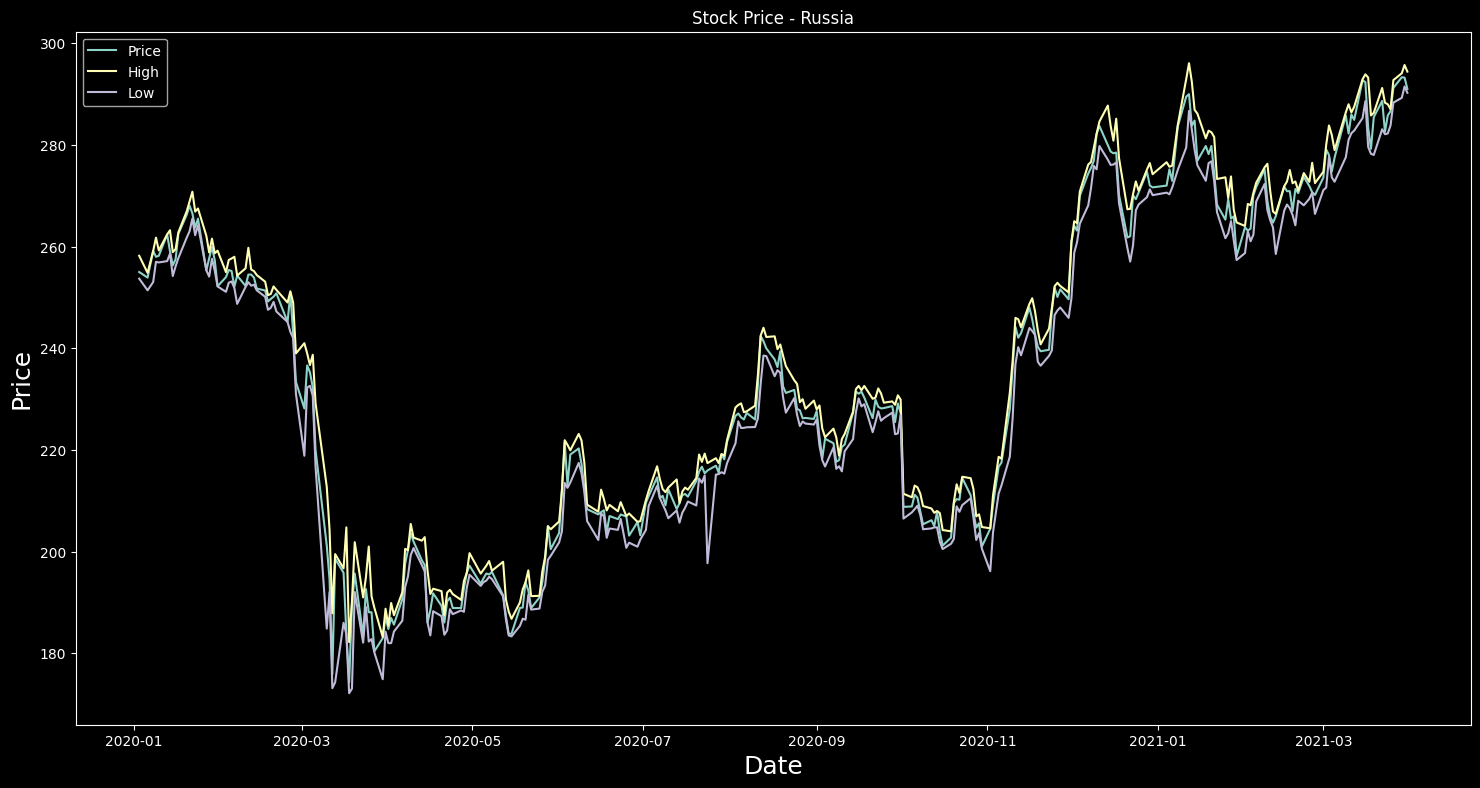

In [29]:
plot_stock_data(russia, "Russia")
candlestick_volume(russia, "Russia")

##### There doesn't seem to be any specific pattern in the Russia market other than the price has been trending up even since March 2020 which is when the COVID-19 pandemic started. The volume is highest around March 2020 and November 2020.

In [30]:
#plot_stock_data(turkey, "Turkey")
candlestick_volume(turkey, "Turkey")

In [31]:
#plot_stock_data(egypt, "Egypt")
candlestick_volume(egypt, "Egypt")

In [32]:
#plot_stock_data(brazil, "Brazil")
candlestick_volume(brazil, "Brazil")

In [33]:
#plot_stock_data(argentina, "Argentina")
candlestick_volume(argentina, "Argentina")

In [34]:
#plot_stock_data(colombia, "Colombia")
candlestick_volume(colombia, "Colombia")

In [35]:
#plot_stock_data(safrica, "South Africa")
candlestick_volume(safrica, "South Africa")

In [36]:
#plot_stock_data(skorea, "South Korea")
candlestick_volume(skorea, "South Korea")

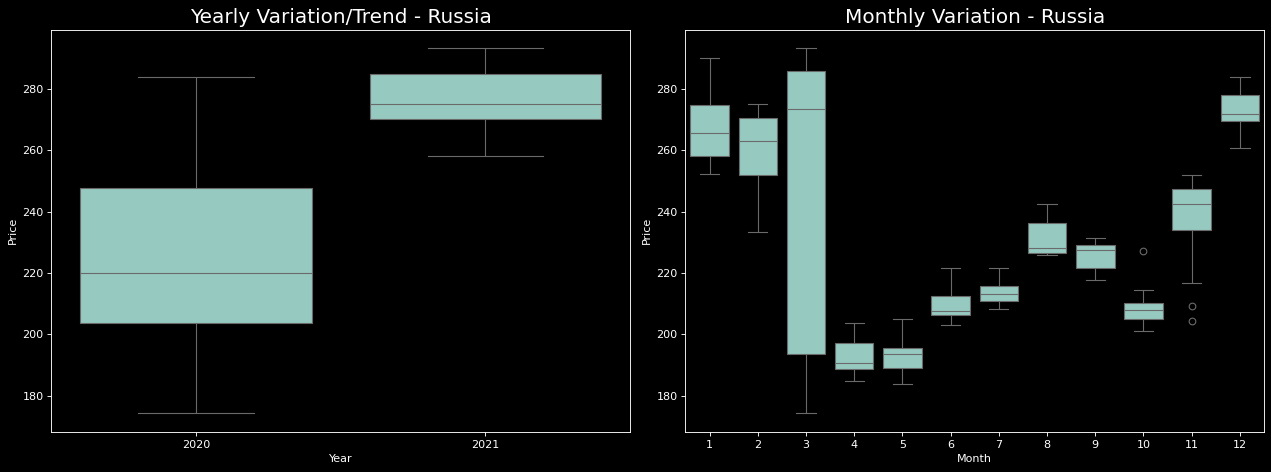

In [37]:
draw_boxplots(russia, "Russia")

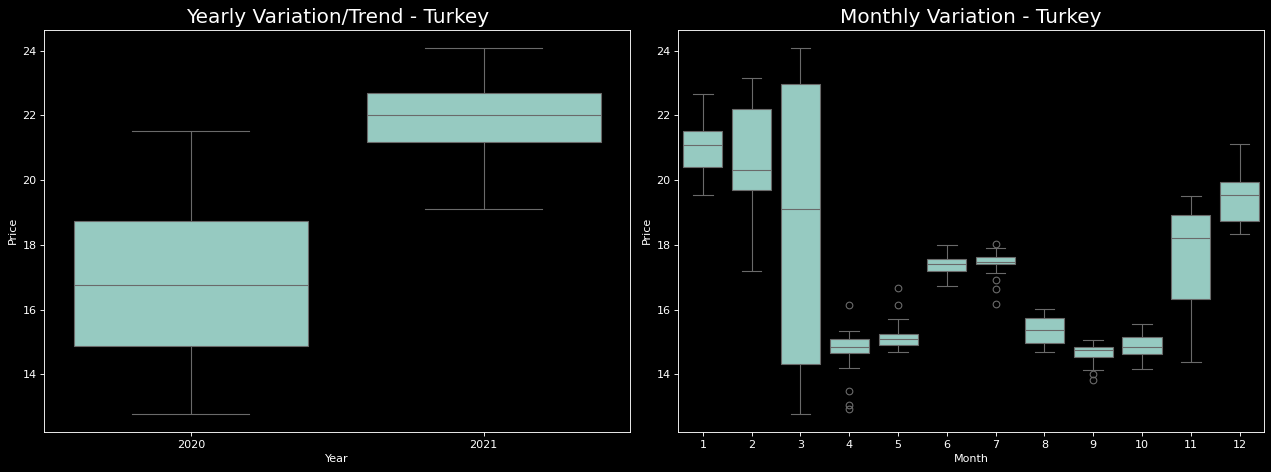

In [38]:
draw_boxplots(turkey, "Turkey")

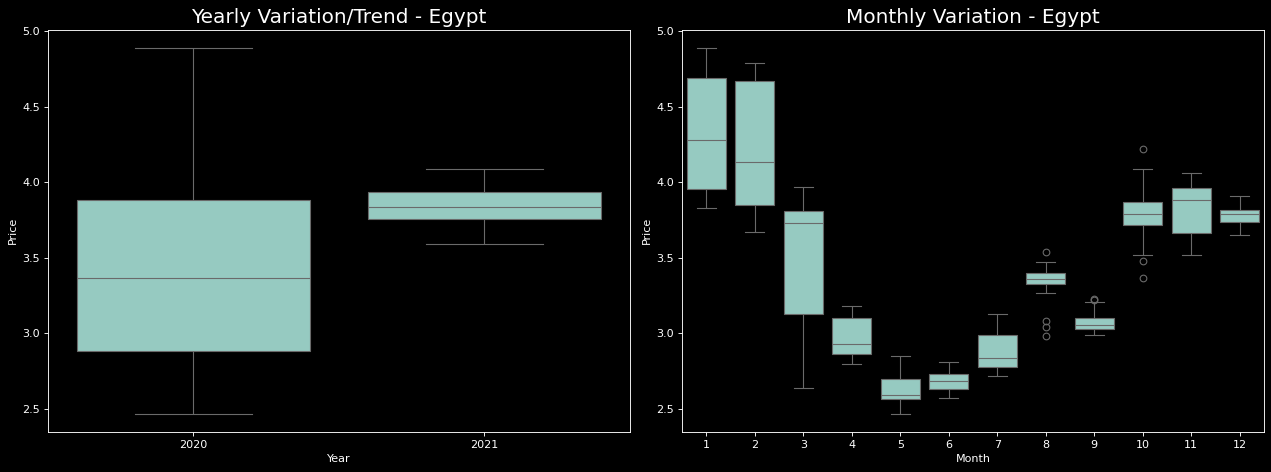

In [39]:
draw_boxplots(egypt, "Egypt")

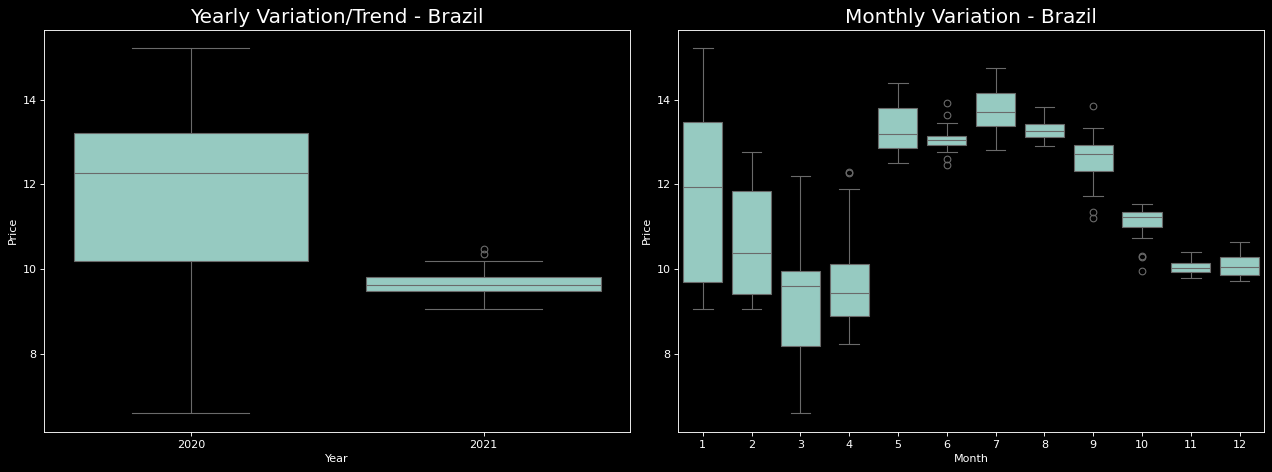

In [40]:
draw_boxplots(brazil, "Brazil")

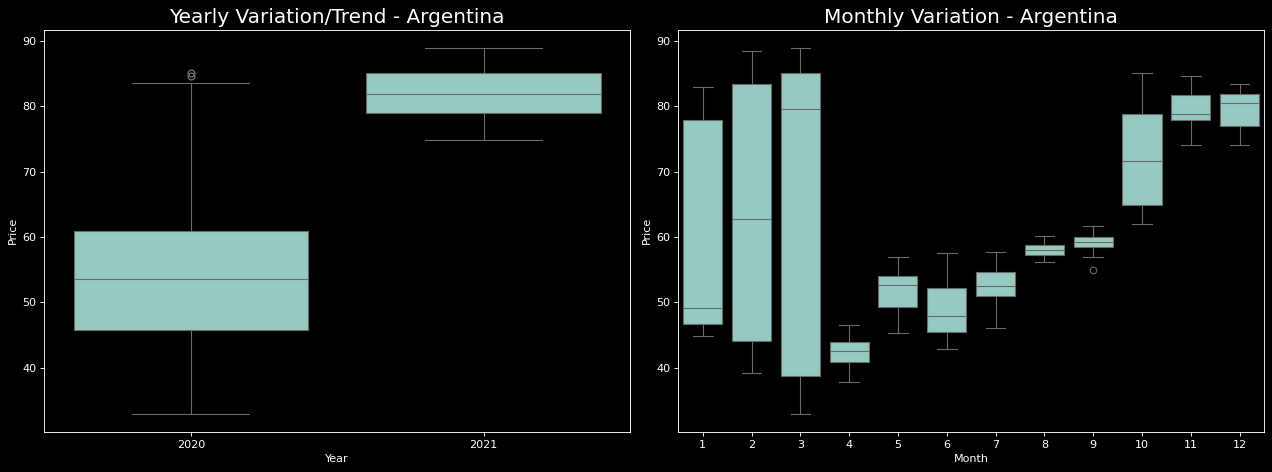

In [41]:
draw_boxplots(argentina, "Argentina")

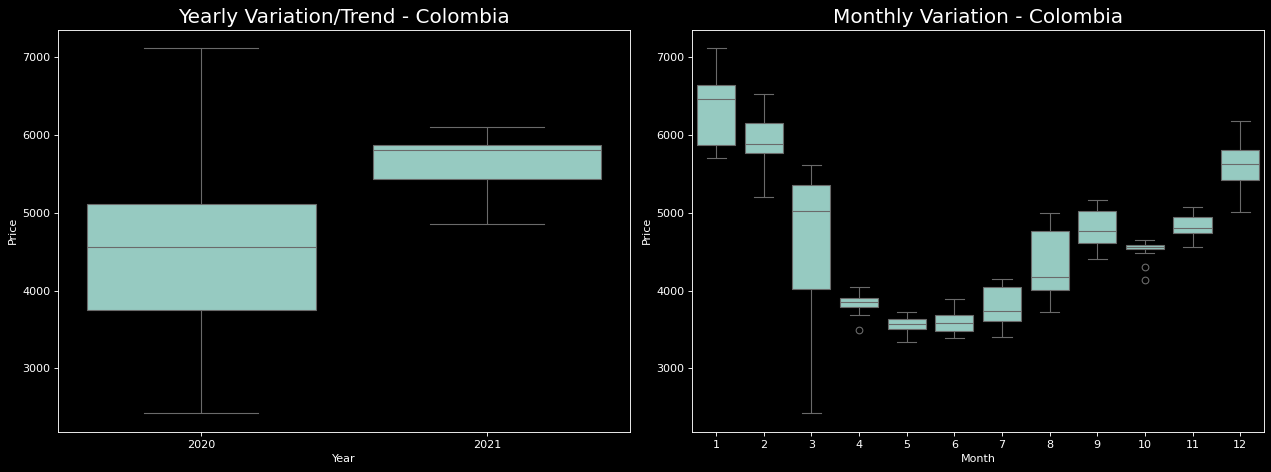

In [42]:
draw_boxplots(colombia, "Colombia")

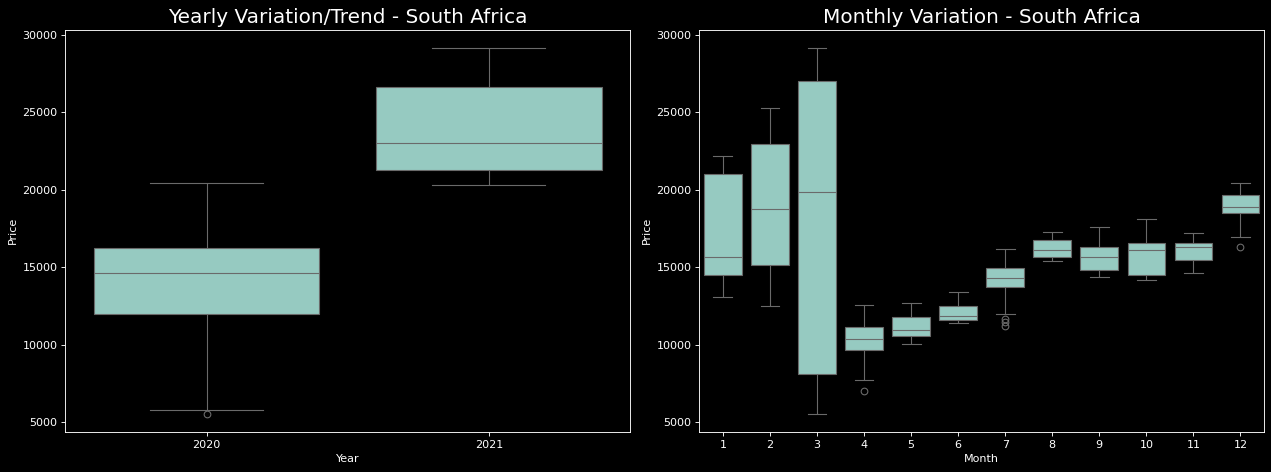

In [43]:
draw_boxplots(safrica, "South Africa")

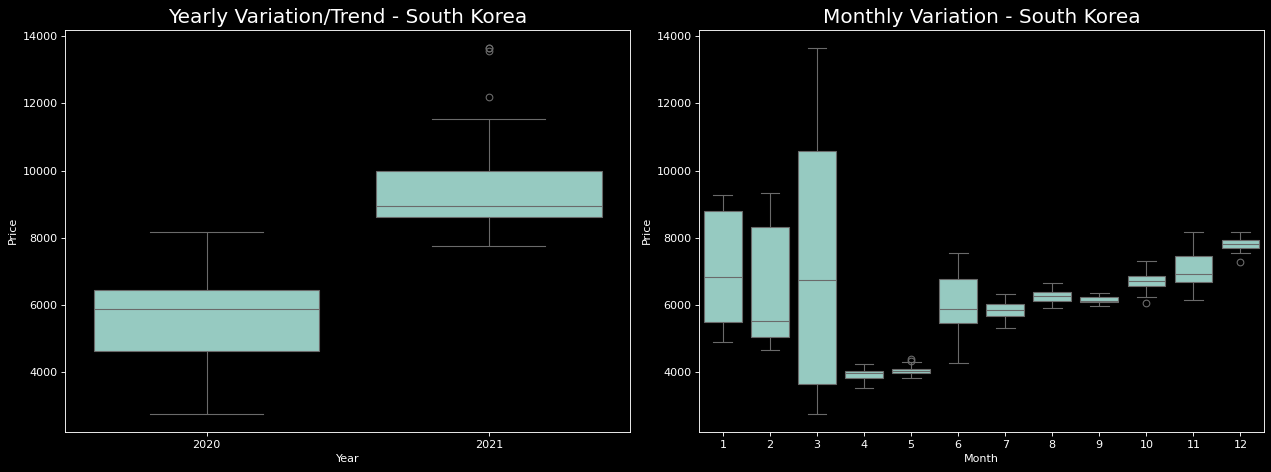

In [44]:
draw_boxplots(skorea, "South Korea")

##### Data Modeling

##### We will used different models (Linear Regression, ARIMA, SARIMAX, Prophet) in order to determine which is best in order to predict future prices.

##### We will use the Root Mean Squared (RMSE) and the mean absolute percentage erro (MAPE) in order to determine the goodness of fit. RMSE is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. MAPE expresses accurary as the ratio of the absolute value of the difference between actual and forecasted value divided by the actual value. The absolute value of this ratio is summed for every forecasted point in time and divided by the number of fitted points n.

##### Bollinger Bands are composed of three lines. One of the more common calculations uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The lower band is calculated by taking the middle band and subtracting twice the daily standard deviation.

##### A common approach when using Bollinger Bands® is to identify overbought or oversold market conditions. When the price of the asset breaks below the lower band of the Bollinger Bands, it suggests that prices have perhaps fallen too much and are due to bounce. Conversely, when the price breaks above the upper band, it indicates that the market may be overbought and due for a pullback.

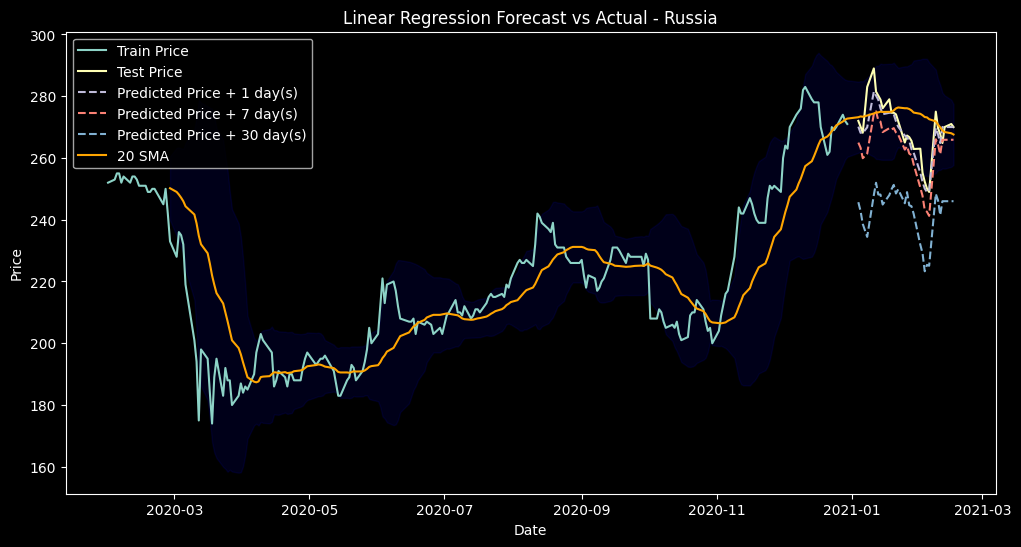

Lead 1 day(s):
Root Mean Squared Error: 9.139918710470539
Mean Absolute Percentage Error: 2.1958828838247886%

Lead 7 day(s):
Root Mean Squared Error: 12.390135199835711
Mean Absolute Percentage Error: 3.5987397060725033%

Lead 30 day(s):
Root Mean Squared Error: 39.429749593676846
Mean Absolute Percentage Error: 13.239346500103743%



In [45]:
linear_regression_forecast(russia, "Russia")

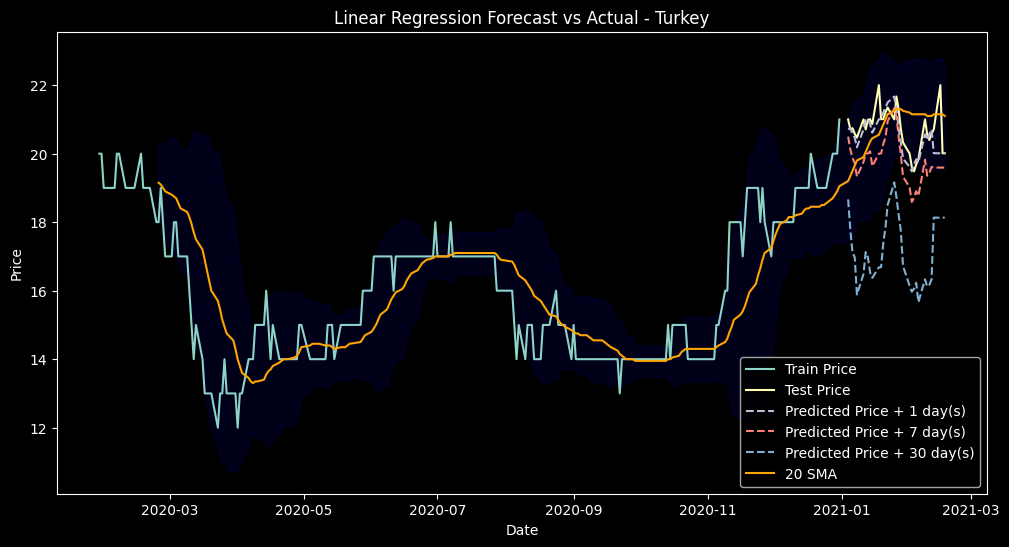

Lead 1 day(s):
Root Mean Squared Error: 1.0918590500566496
Mean Absolute Percentage Error: 4.454916060693302%

Lead 7 day(s):
Root Mean Squared Error: 2.0424285607041206
Mean Absolute Percentage Error: 8.016454599547854%

Lead 30 day(s):
Root Mean Squared Error: 4.917173521096563
Mean Absolute Percentage Error: 20.67924038376499%



In [46]:
linear_regression_forecast(turkey, "Turkey")

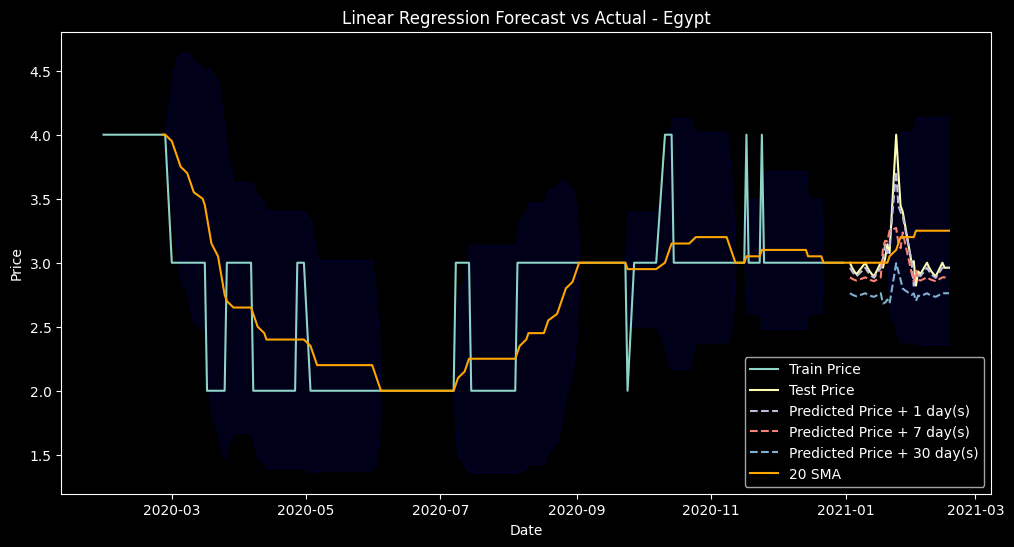

Lead 1 day(s):
Root Mean Squared Error: 0.3464844671867798
Mean Absolute Percentage Error: 5.641144399461203%

Lead 7 day(s):
Root Mean Squared Error: 0.44141036211828183
Mean Absolute Percentage Error: 7.9307399228968105%

Lead 30 day(s):
Root Mean Squared Error: 0.2484789940921705
Mean Absolute Percentage Error: 8.012954707635373%



In [47]:
linear_regression_forecast(egypt, "Egypt")

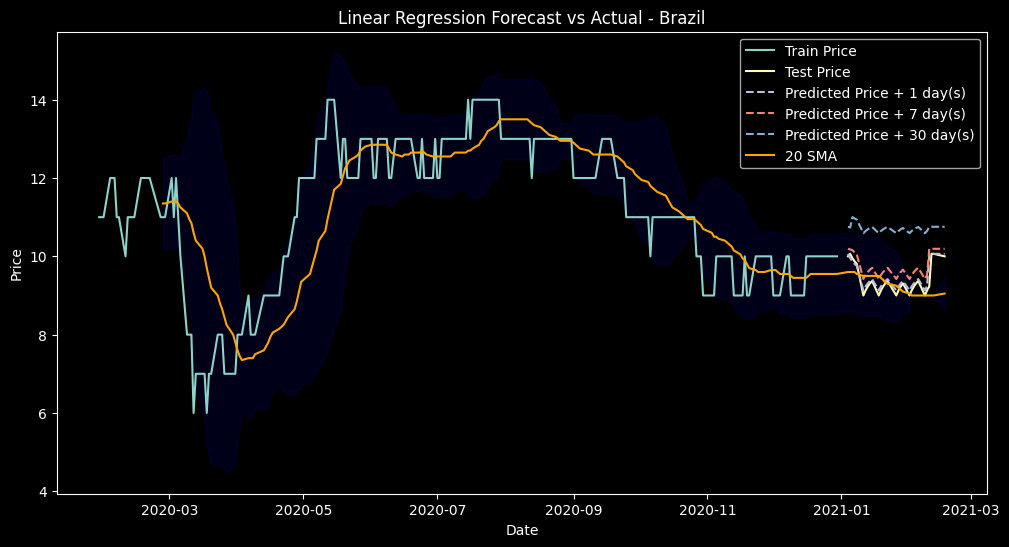

Lead 1 day(s):
Root Mean Squared Error: 0.5544112327046071
Mean Absolute Percentage Error: 4.988231886323093%

Lead 7 day(s):
Root Mean Squared Error: 0.7907099668193447
Mean Absolute Percentage Error: 8.137238330825012%

Lead 30 day(s):
Root Mean Squared Error: 1.5952932471633003
Mean Absolute Percentage Error: 17.090624819916773%



In [48]:
linear_regression_forecast(brazil, "Brazil")

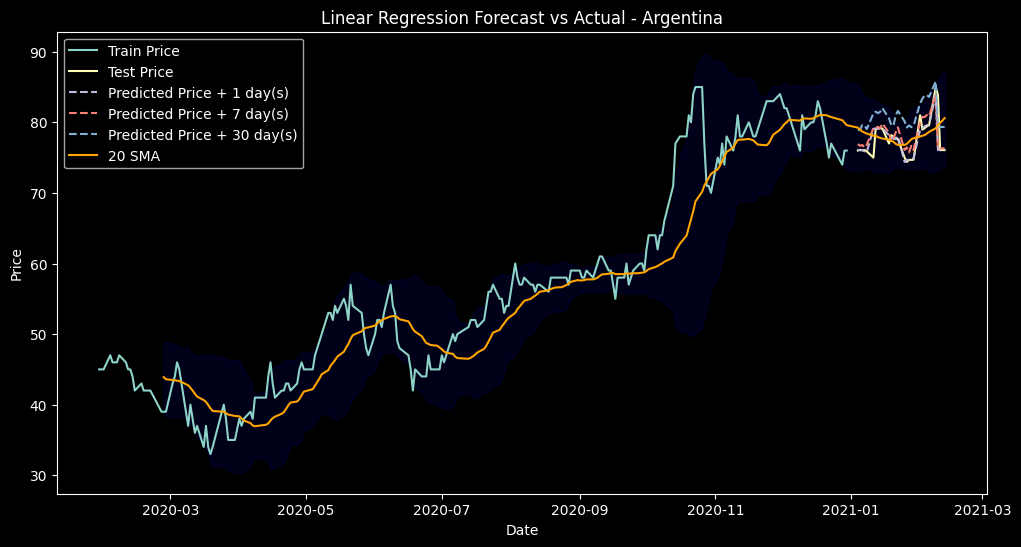

Lead 1 day(s):
Root Mean Squared Error: 4.697526754035376
Mean Absolute Percentage Error: 4.645482550437792%

Lead 7 day(s):
Root Mean Squared Error: 4.388480858415555
Mean Absolute Percentage Error: 4.308617967347658%

Lead 30 day(s):
Root Mean Squared Error: 4.538415903955864
Mean Absolute Percentage Error: 4.599448748681943%



In [49]:
linear_regression_forecast(argentina, "Argentina")

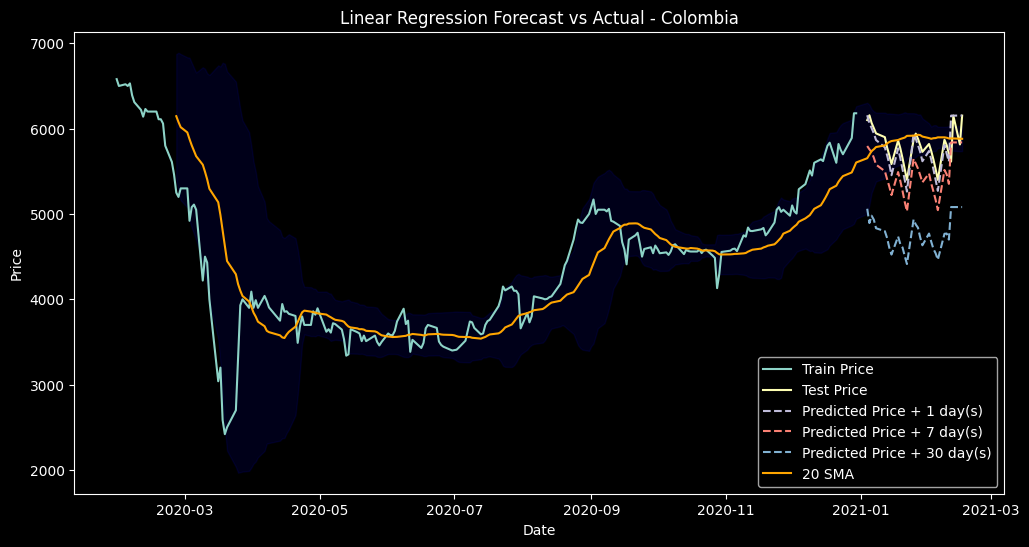

Lead 1 day(s):
Root Mean Squared Error: 312.0670978935632
Mean Absolute Percentage Error: 4.444765317059369%

Lead 7 day(s):
Root Mean Squared Error: 457.5007357048801
Mean Absolute Percentage Error: 6.777783120105566%

Lead 30 day(s):
Root Mean Squared Error: 739.9819820600832
Mean Absolute Percentage Error: 11.82498586253984%



In [50]:
linear_regression_forecast(colombia, "Colombia")

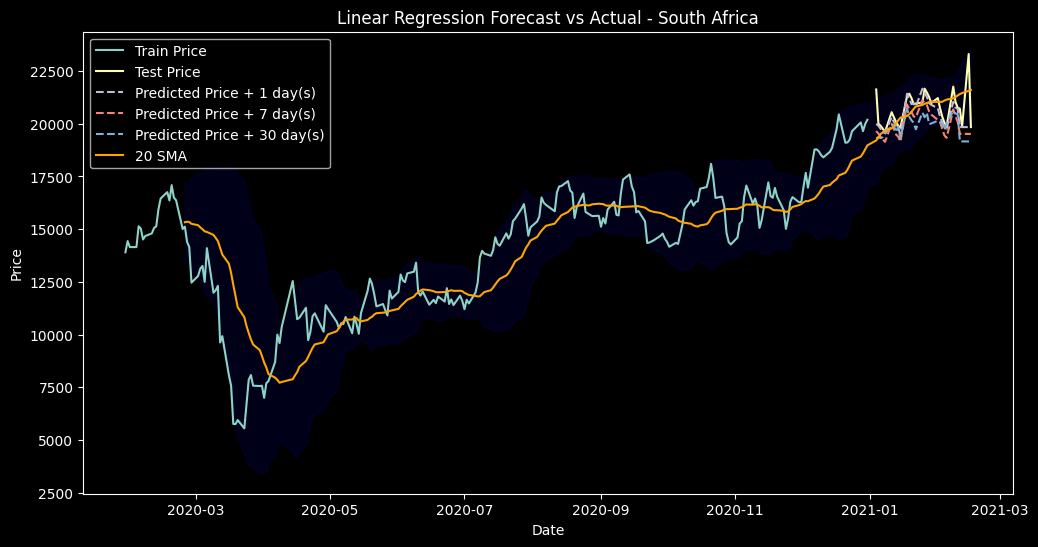

Lead 1 day(s):
Root Mean Squared Error: 1509.395652240767
Mean Absolute Percentage Error: 5.401509573999931%

Lead 7 day(s):
Root Mean Squared Error: 2632.3217930828932
Mean Absolute Percentage Error: 9.618178114951492%

Lead 30 day(s):
Root Mean Squared Error: 6431.213217360735
Mean Absolute Percentage Error: 23.562915822824372%



In [51]:
linear_regression_forecast(safrica, "South Africa")

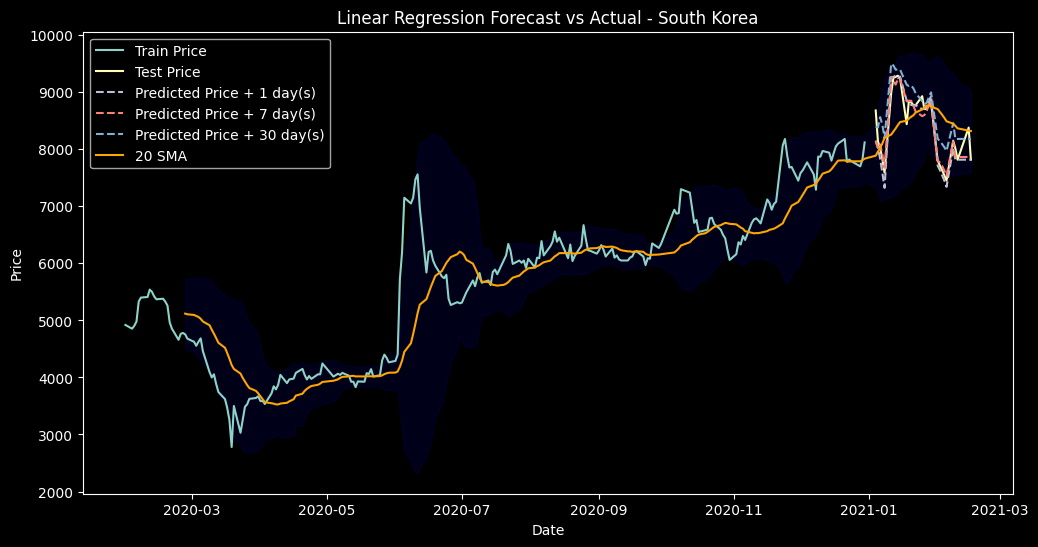

Lead 1 day(s):
Root Mean Squared Error: 769.3087447601254
Mean Absolute Percentage Error: 7.18790370306068%

Lead 7 day(s):
Root Mean Squared Error: 813.6105725355987
Mean Absolute Percentage Error: 8.911905349357548%

Lead 30 day(s):
Root Mean Squared Error: 2425.1116040658912
Mean Absolute Percentage Error: 15.566404578840428%



In [52]:
linear_regression_forecast(skorea, "South Korea")

##### The ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) models are both used for time series forecasting, but they have some key differences: ARIMA handles non-seasonal data, does not handle exogenous variables and is useful for simple, non-seasonal datasets. Whereas SARIMAX handles both seasonal and non-seasonal data, can incorporate exogenous variables (regressors) which can improve the forecast by including external information and is more flexible and powerful for complex datasets with seasonality and external factors.

ADF Statistic: -1.4233235279675926
p-value: 0.5710448680935923
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-714.367, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-768.989, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-716.367, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-800.462, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-833.153, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-837.142, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-837.488, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-858.849, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-854.015, Time=0.41 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-860.308, Time=0.59 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-860.635, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-862

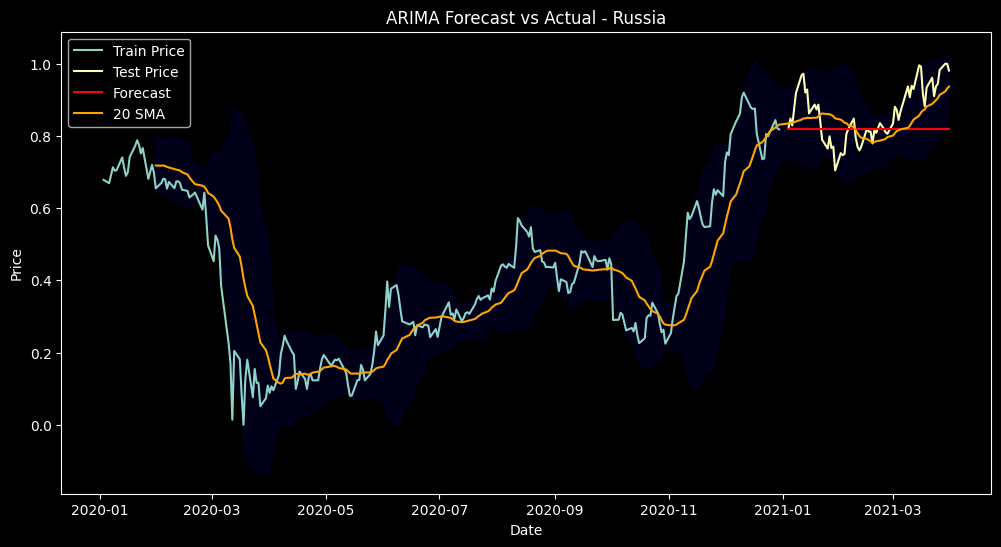

RMSE: 0.08772171000816459
MAPE: 7.681601587605252%


(0.08772171000816459, 0.07681601587605252)

In [53]:
arima(russia, "Russia")

ADF Statistic: -1.5241208674752984
p-value: 0.5215471446531429
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-797.084, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-854.141, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-799.084, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-892.936, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-922.165, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-927.949, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-927.571, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-945.646, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-944.013, Time=0.34 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-942.131, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-944.547, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-945

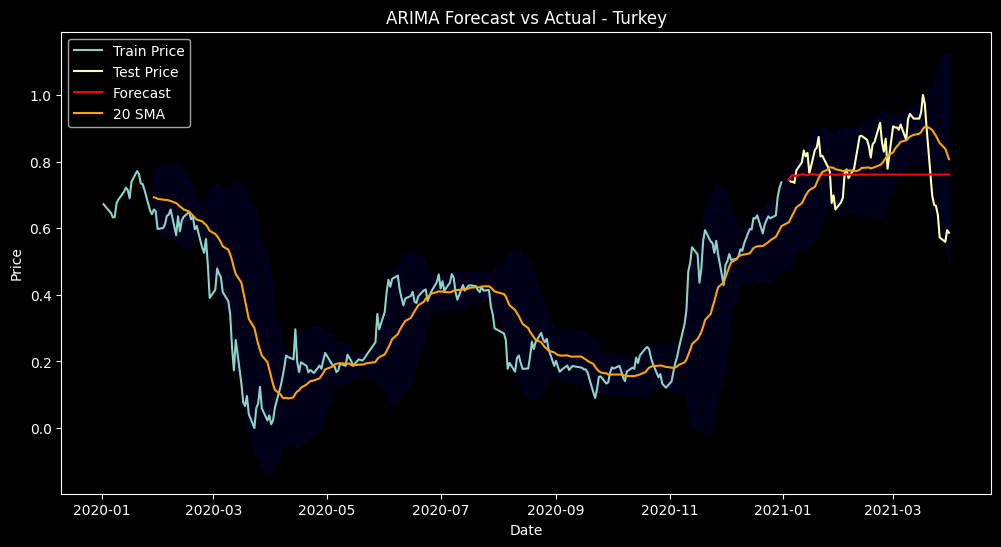

RMSE: 0.11225544063736562
MAPE: 11.812020447527075%


(0.11225544063736562, 0.11812020447527075)

In [54]:
arima(turkey, 'Turkey')

ADF Statistic: -1.542417678277975
p-value: 0.5124333991631931
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-793.410, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-827.126, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-795.357, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-839.237, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-851.955, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-856.239, Time=0.38 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-860.433, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-872.132, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-878.806, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-886.700, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-889.504, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, 

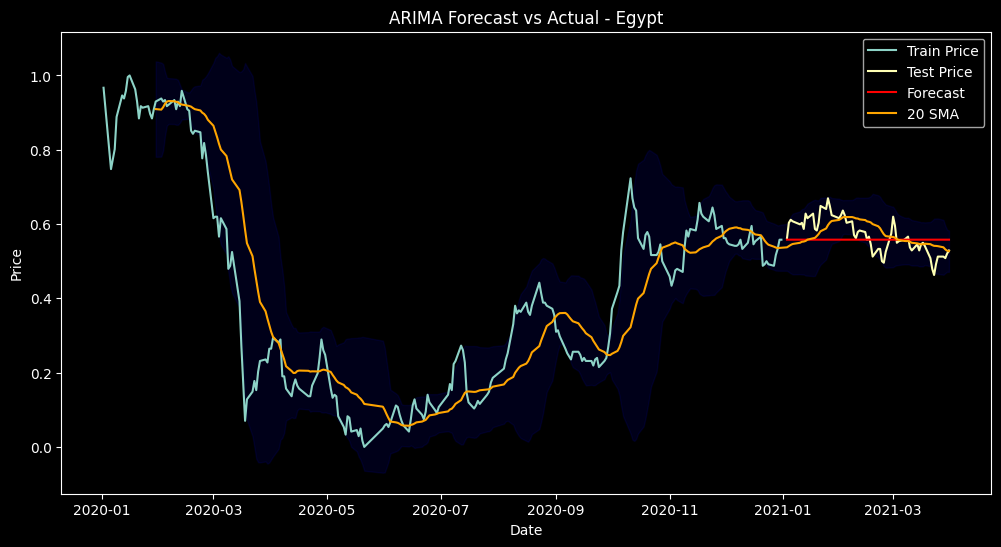

RMSE: 0.04824239864099044
MAPE: 7.001410756345037%


(0.04824239864099044, 0.07001410756345038)

In [55]:
arima(egypt, "Egypt")

ADF Statistic: -2.1956983927966975
p-value: 0.2078103950122735
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-602.897, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-706.077, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-604.894, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-758.596, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-763.158, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-762.039, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-793.811, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-789.029, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-781.775, Time=0.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-787.046, Time

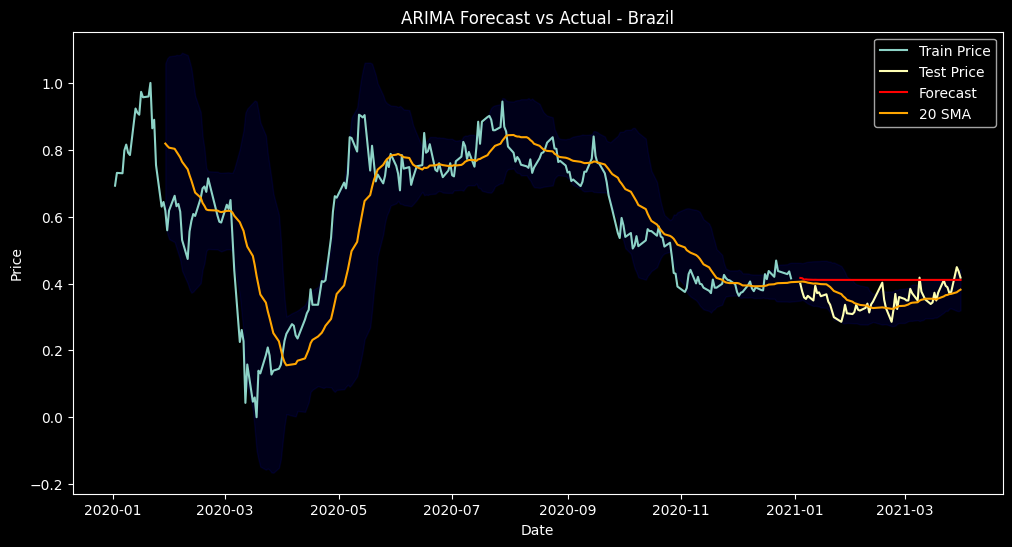

RMSE: 0.06581023094100993
MAPE: 17.491066239355984%


(0.06581023094100993, 0.17491066239355985)

In [56]:
arima(brazil, "Brazil")

ADF Statistic: -0.7426681664185706
p-value: 0.8353858829030216
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-706.629, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-790.796, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-708.629, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-805.669, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-826.419, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-834.228, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-837.338, Time=0.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-863.930, Time=0.49 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-874.289, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-870.298, Time=0.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-869.659, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-869

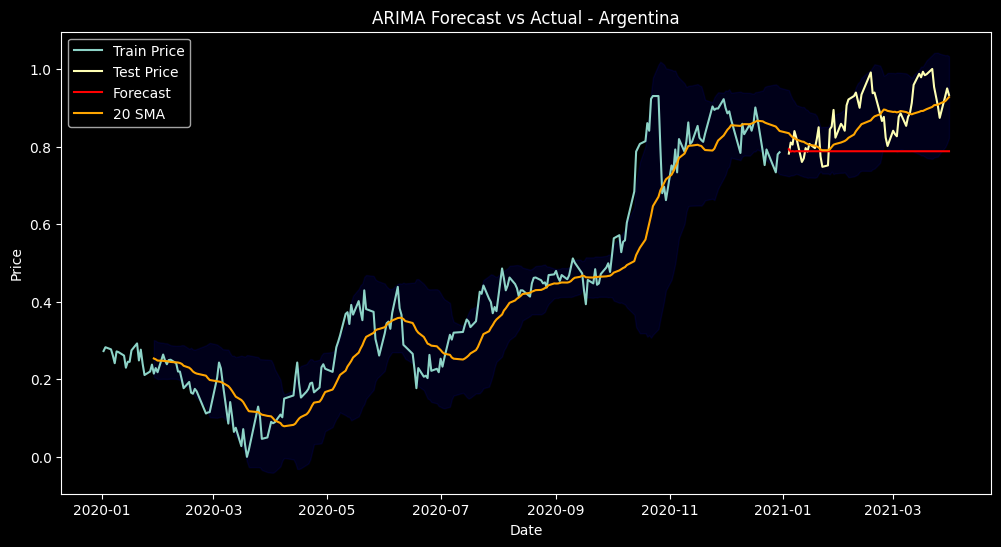

RMSE: 0.11035819608944407
MAPE: 10.002499853423451%


(0.11035819608944407, 0.10002499853423452)

In [57]:
arima(argentina, "Argentina")

ADF Statistic: -1.8521235185529443
p-value: 0.3549077427799207
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-789.409, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-864.380, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-791.408, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-881.453, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-904.315, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-902.334, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-926.650, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-931.578, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-930.385, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-923.163, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-933.517,

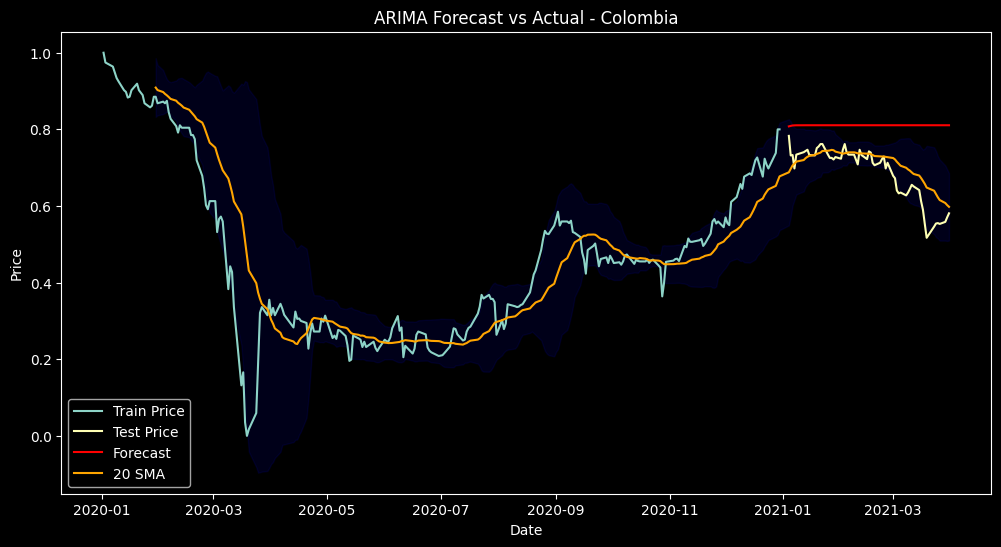

RMSE: 0.14186060570312264
MAPE: 19.37704901185925%


(0.14186060570312264, 0.1937704901185925)

In [58]:
arima(colombia, 'Colombia')

ADF Statistic: -0.9104458387885497
p-value: 0.784512991626399
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-891.072, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-969.059, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-893.071, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1016.859, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1028.943, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1027.778, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1061.394, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1063.308, Time=0.76 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1060.652, Time=1.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1060.218, Time=1.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-10

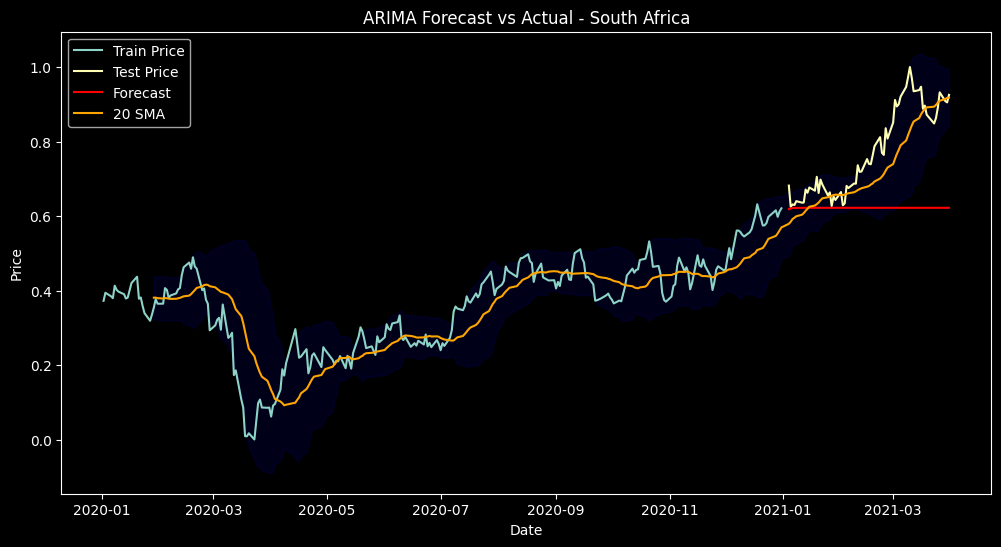

RMSE: 0.19040968948250178
MAPE: 17.619406214638538%


(0.19040968948250178, 0.1761940621463854)

In [59]:
arima(safrica, "South Africa")

ADF Statistic: -0.7147344722777224
p-value: 0.8428959732099582
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1052.480, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1126.884, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1054.477, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1141.821, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1158.553, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1166.284, Time=0.10 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1165.879, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1188.415, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1189.382, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1199.263, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC

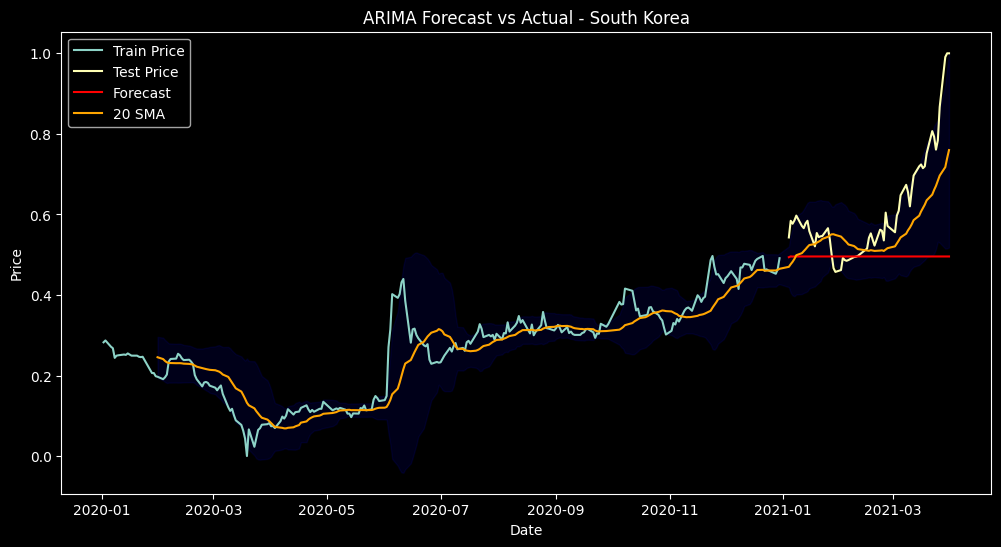

RMSE: 0.17365500401005626
MAPE: 17.03545838708105%


(0.17365500401005626, 0.1703545838708105)

In [60]:
arima(skorea, "South Korea")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1392.977, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1394.453, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1394.400, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1391.044, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1395.383, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.633 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  231
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -694.522
Date:                Wed, 26 Jun 2024   AIC                           1391.044
Time:                        09:47:40   BIC                           1394.482
Sample:                             0   HQIC                          1392.431
               

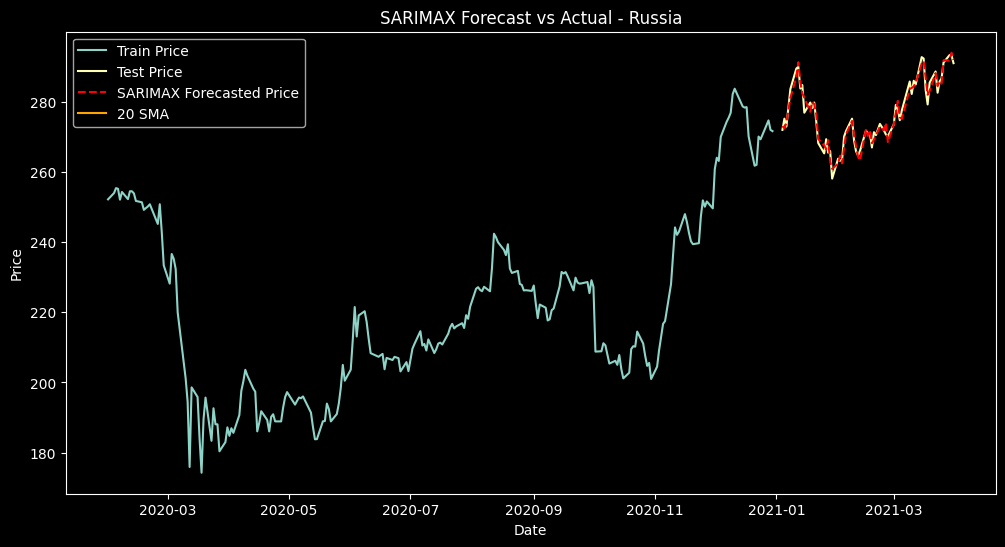

RMSE: 1.9235847094812106
MAPE: 0.5970281535059828%


In [61]:
#SARIMAX
sarimax_forecast(russia, "Russia")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=252.627, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=392.580, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=336.989, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=247.271, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=249.211, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=249.204, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.932 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -121.635
Date:                Wed, 26 Jun 2024   AIC                            247.271
Time:                        09:47:56   BIC         

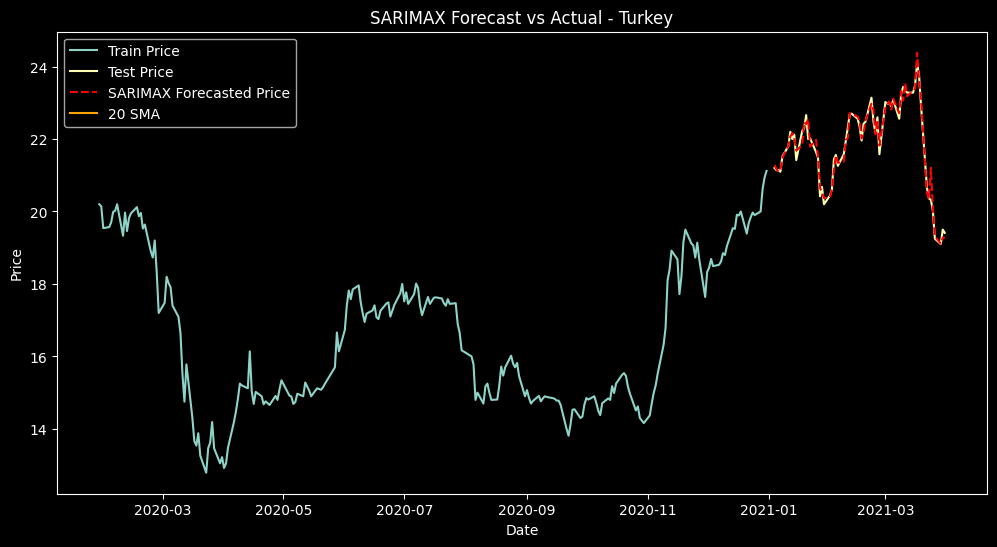

RMSE: 0.20857224058778895
MAPE: 0.6768542763315563%


In [62]:
sarimax_forecast(turkey, 'Turkey')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-445.802, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-441.855, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-450.721, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-449.317, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-443.398, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-449.456, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-449.797, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-447.985, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-452.431, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-451.202, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-451.576, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-450.983, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-449.778, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.135 seconds
                      

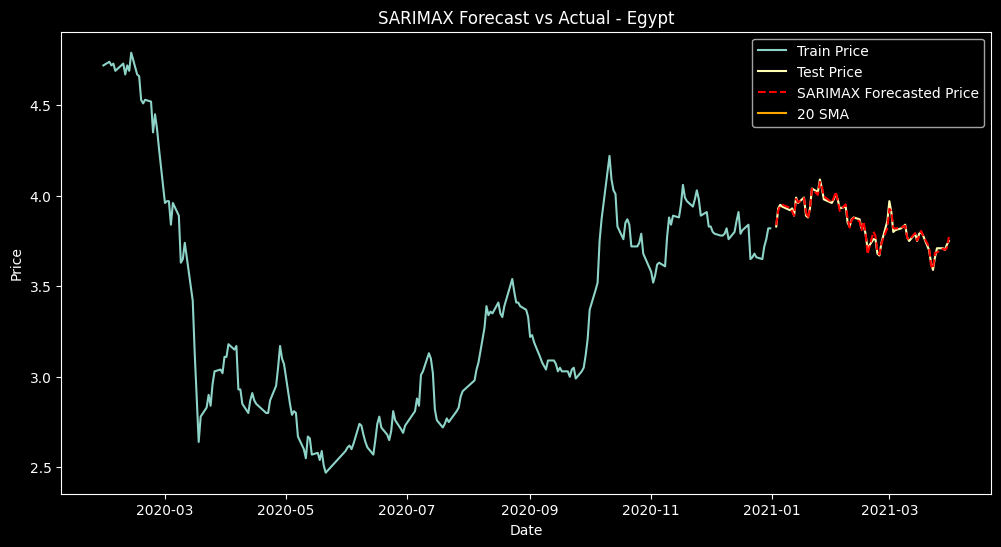

RMSE: 0.014989797019610934
MAPE: 0.296160365710826%


In [63]:
sarimax_forecast (egypt, "Egypt")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=223.314, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=229.789, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=229.290, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=229.755, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=227.874, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=227.065, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=228.294, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=224.717, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=224.798, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=230.707, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=226.854, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=227.751, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=226.176, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=221.395, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=225.1

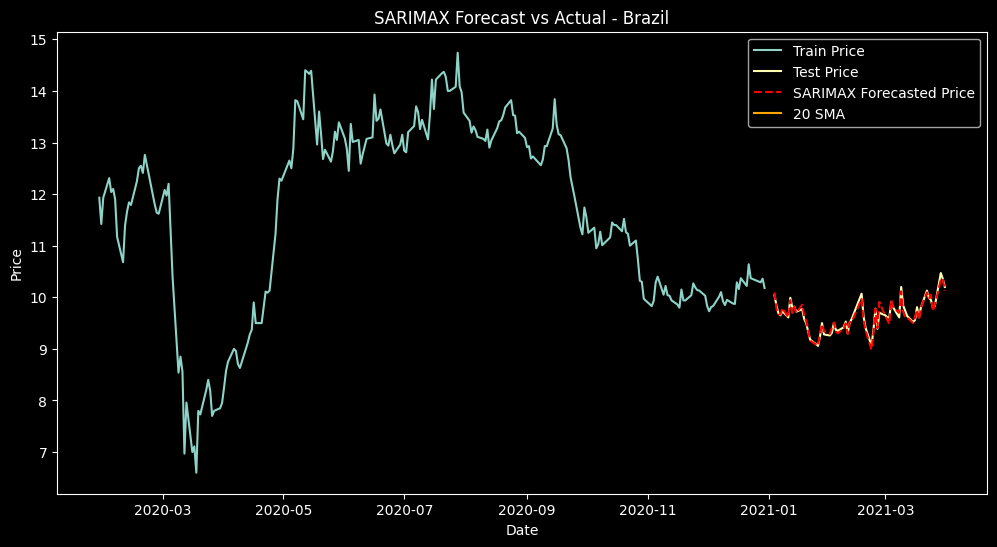

RMSE: 0.06495003738226186
MAPE: 0.5192212503073456%


In [64]:
sarimax_forecast (brazil, "Brazil")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=960.444, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=961.532, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=961.591, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=959.464, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=962.239, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.498 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  221
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -478.732
Date:                Wed, 26 Jun 2024   AIC                            959.464
Time:                        09:49:47   BIC                            962.858
Sample:                             0   HQIC                           960.835
                    

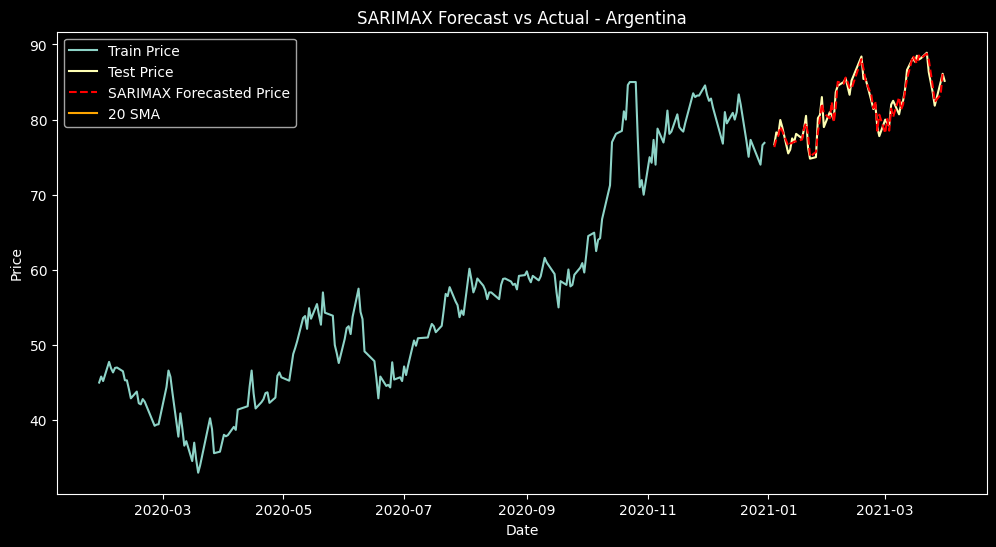

RMSE: 1.0431208361222986
MAPE: 1.0073110703831794%


In [65]:
sarimax_forecast (argentina, "Argentina")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2893.142, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3024.931, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2955.110, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2893.121, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2894.510, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2894.617, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2895.395, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.653 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1444.560
Date:                Wed, 26 Jun 2024   AIC                           2893.121
Time:                        09:49:56   B

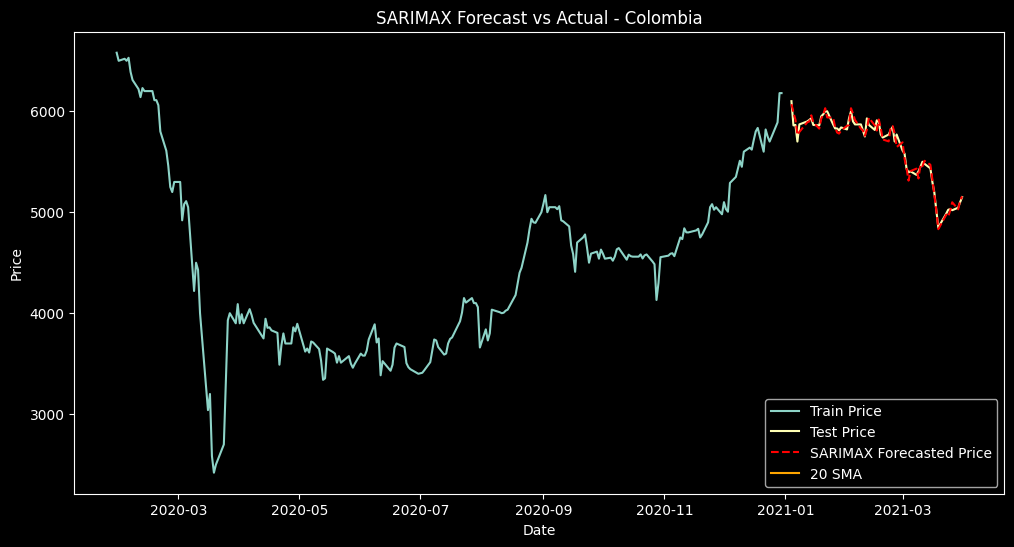

RMSE: 52.345578079835
MAPE: 0.7434527481876495%


In [66]:
sarimax_forecast (colombia, 'Colombia')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3680.796, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3682.625, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3682.623, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3679.179, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3684.623, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.492 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1838.590
Date:                Wed, 26 Jun 2024   AIC                           3679.179
Time:                        09:50:11   BIC                           3682.626
Sample:                             0   HQIC                          3680.569
               

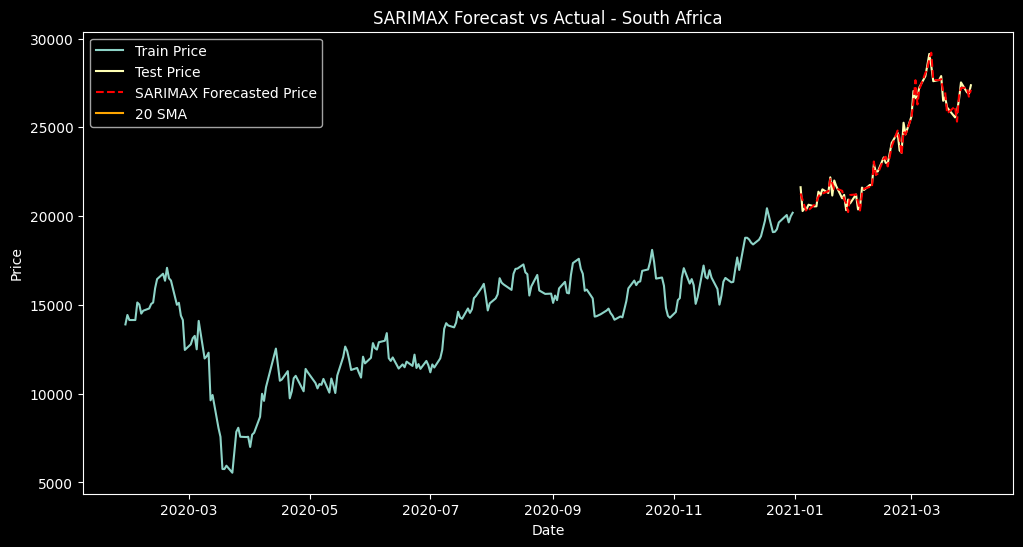

RMSE: 360.19673736179357
MAPE: 1.2242357431003559%


In [67]:
sarimax_forecast (safrica, "South Africa")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3131.380, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3128.627, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3130.063, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3130.138, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3127.483, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3131.439, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.530 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  229
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1562.741
Date:                Wed, 26 Jun 2024   AIC                           3127.483
Time:                        09:50:29   BIC                           3130.912
Sample:                             0   HQIC                          3128.866
          

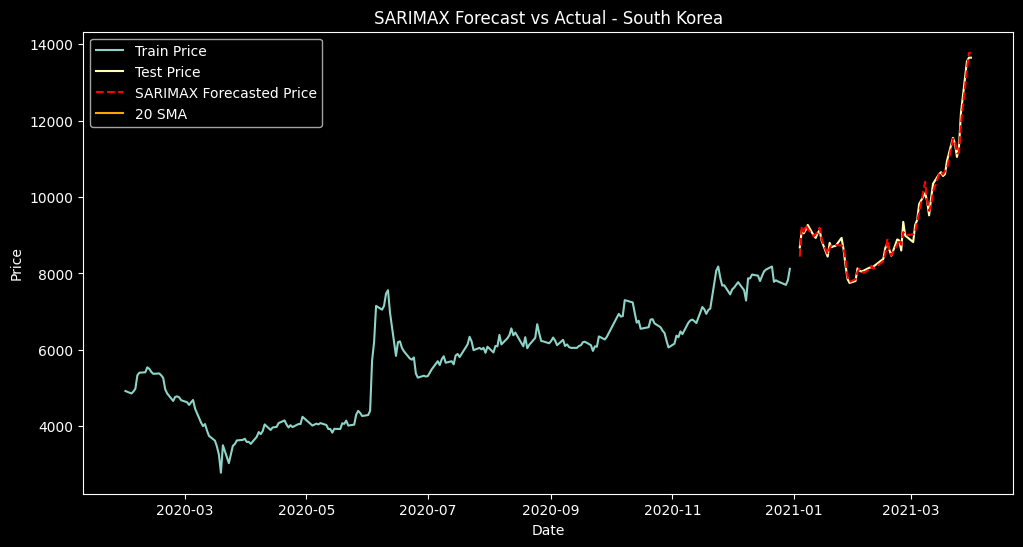

RMSE: 125.79442885003483
MAPE: 1.0394658607551233%


In [68]:
sarimax_forecast (skorea, "South Korea")

##### Prophet is a forecasting tool developed by Meta designed to forecast time series data as a sum of several components: trend, seasonality and holidays/events.

09:50:44 - cmdstanpy - INFO - Chain [1] start processing
09:50:44 - cmdstanpy - INFO - Chain [1] done processing


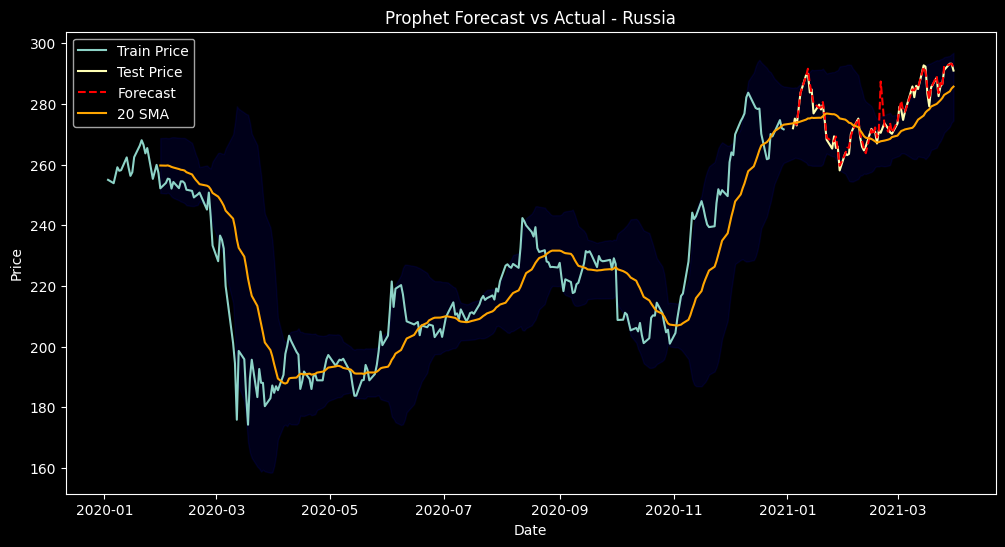

RMSE: 2.6583401196057155
MAPE: 0.5481922498521682%


In [69]:
#Prophet
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
russia
prophet_forecast(russia, "Russia")

09:50:44 - cmdstanpy - INFO - Chain [1] start processing
09:50:45 - cmdstanpy - INFO - Chain [1] done processing


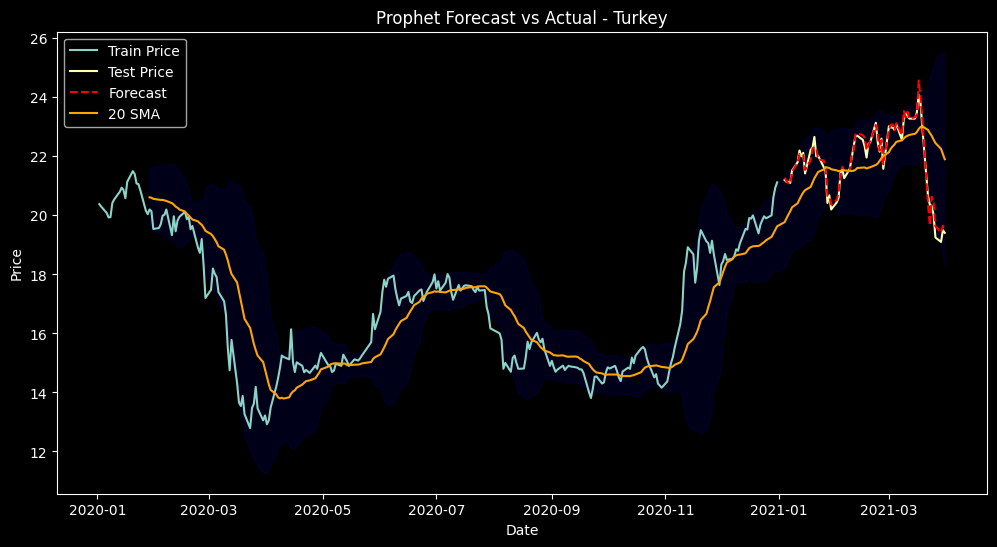

RMSE: 0.20253597056260011
MAPE: 0.7154285558284936%


In [70]:
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
turkey=preprocess_dataframe(turkey)
prophet_forecast(turkey, 'Turkey')

09:50:45 - cmdstanpy - INFO - Chain [1] start processing
09:50:45 - cmdstanpy - INFO - Chain [1] done processing


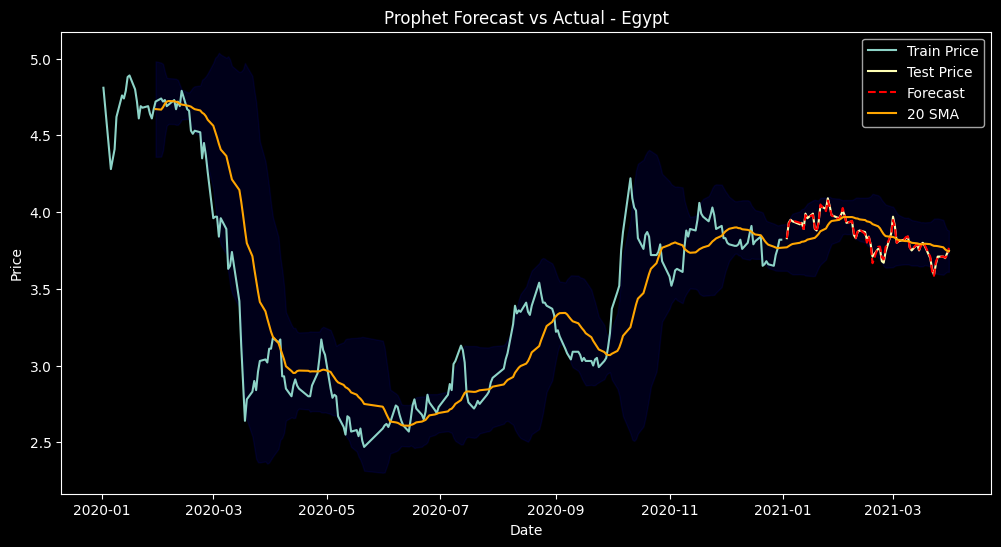

RMSE: 0.012046516459270505
MAPE: 0.23799553506551613%


In [71]:
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
egypt =preprocess_dataframe(egypt)
prophet_forecast (egypt, "Egypt")

09:50:46 - cmdstanpy - INFO - Chain [1] start processing
09:50:46 - cmdstanpy - INFO - Chain [1] done processing


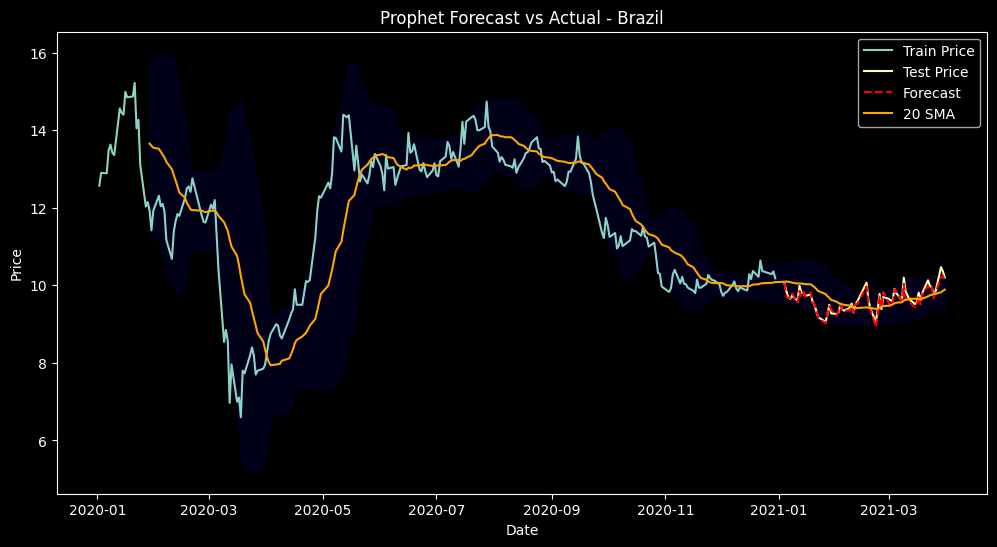

RMSE: 0.08700948151040781
MAPE: 0.6943444436310913%


In [72]:
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
brazil =preprocess_dataframe(brazil)
prophet_forecast (brazil, "Brazil")

09:50:46 - cmdstanpy - INFO - Chain [1] start processing
09:50:46 - cmdstanpy - INFO - Chain [1] done processing


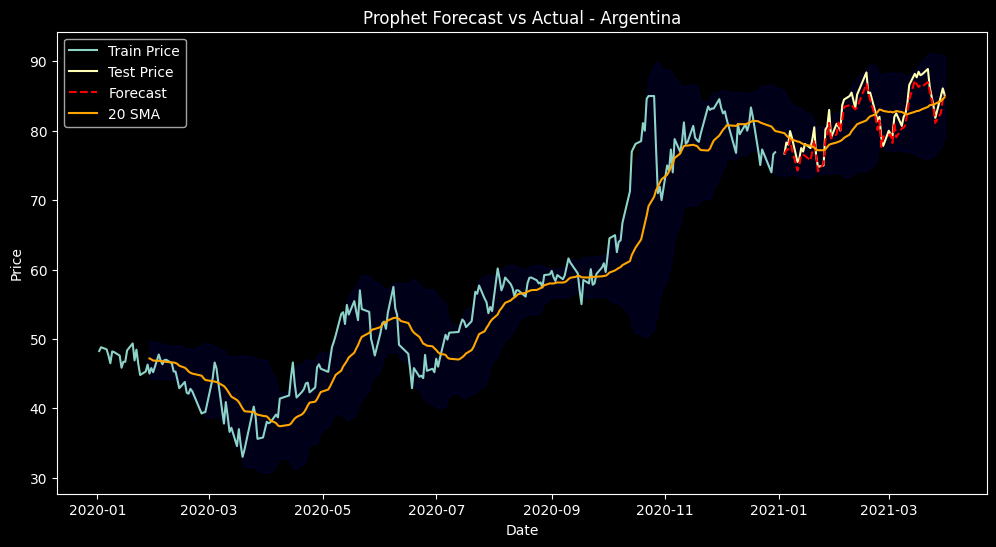

RMSE: 1.3401352293502637
MAPE: 1.386224570533508%


In [73]:
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
argentina =preprocess_dataframe(argentina)
prophet_forecast (argentina, "Argentina")

09:50:47 - cmdstanpy - INFO - Chain [1] start processing
09:50:47 - cmdstanpy - INFO - Chain [1] done processing


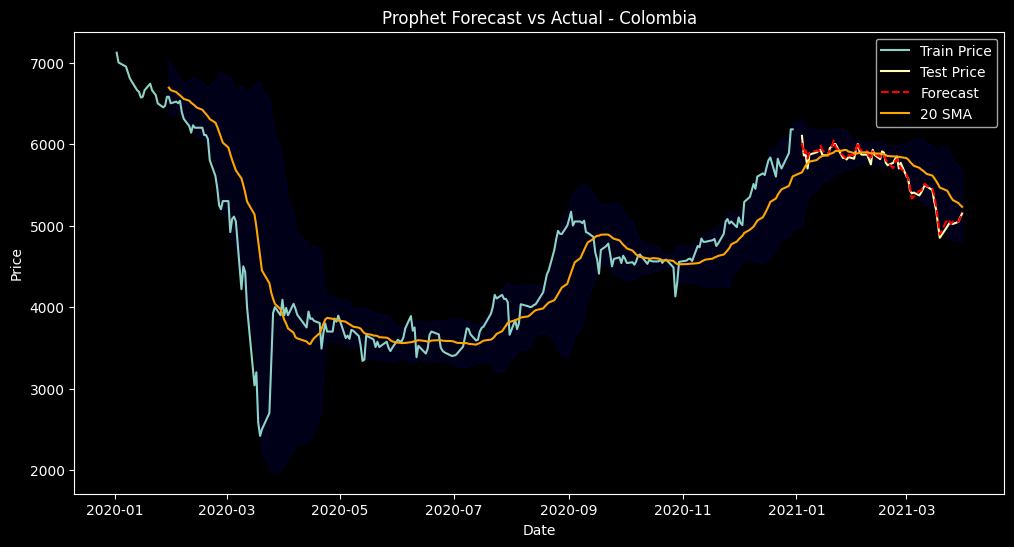

RMSE: 42.228299309946834
MAPE: 0.6114951802117812%


In [74]:
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
colombia =preprocess_dataframe(colombia)
prophet_forecast (colombia, 'Colombia')

09:50:48 - cmdstanpy - INFO - Chain [1] start processing
09:50:48 - cmdstanpy - INFO - Chain [1] done processing


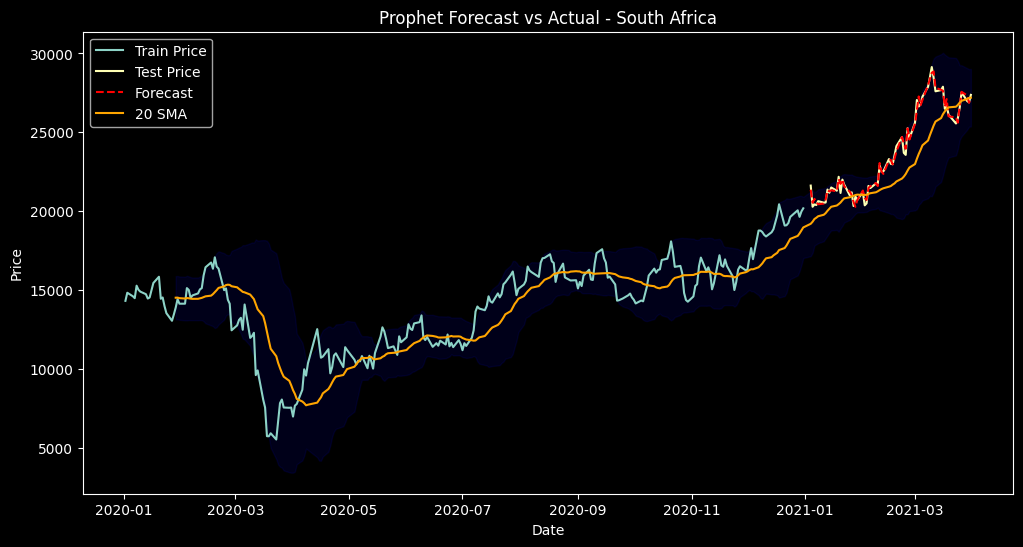

RMSE: 264.94090642229156
MAPE: 0.8599764163332135%


In [75]:
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
safrica =preprocess_dataframe(safrica)
prophet_forecast (safrica, "South Africa")

09:50:48 - cmdstanpy - INFO - Chain [1] start processing
09:50:48 - cmdstanpy - INFO - Chain [1] done processing


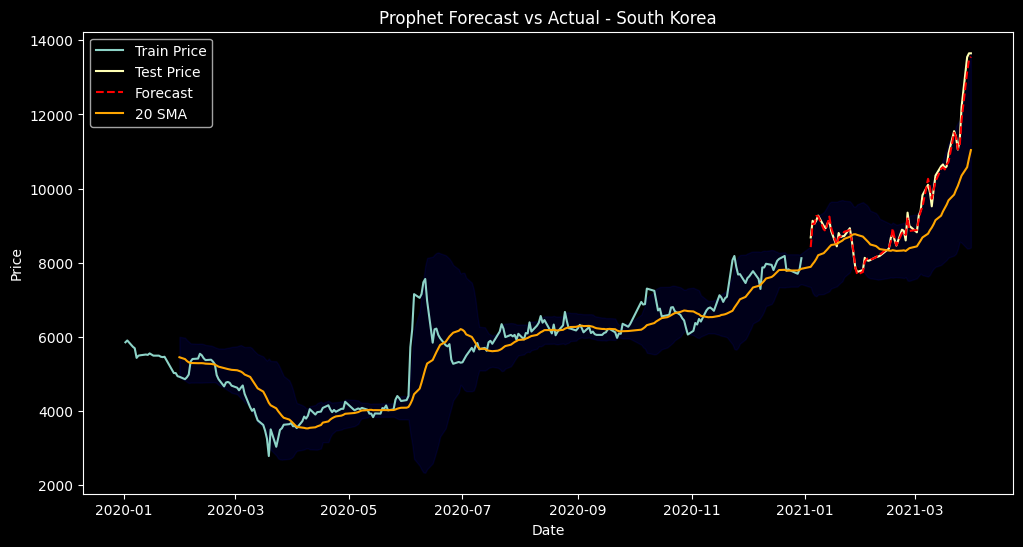

RMSE: 124.00227142160198
MAPE: 0.9323683781038569%


In [76]:
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
skorea =preprocess_dataframe(skorea)
prophet_forecast (skorea, "South Korea")

##### Weekly and Monthly Data

In [77]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
print(russiaw.head())


        Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0 2020-01-05  255.00  255.99  258.19   253.7       35.85    0.0010  2020   
1 2020-01-12  258.19  254.75  261.76   251.4      120.35    0.0127  2020   
2 2020-01-19  262.50   258.3  263.22  254.21      191.51    0.0170  2020   
3 2020-01-26  265.49   263.2   270.8   261.8      180.10    0.0116  2020   
4 2020-02-02  252.20     261   262.1  252.17      219.33   -0.0503  2020   

   Month  
0      1  
1      1  
2      1  
3      1  
4      2  


In [78]:
#plot_stock_data(russiaw, "Russia - Weekly")
candlestick_volume(russiaw, "Russia - Weekly")

ADF Statistic: -1.1439622805197525
p-value: 0.6972258192509497
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-59.865, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-67.641, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61.865, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-73.186, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-77.168, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-75.253, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-79.323, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-78.122, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-77.910, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-76.361, Time=0.25 sec


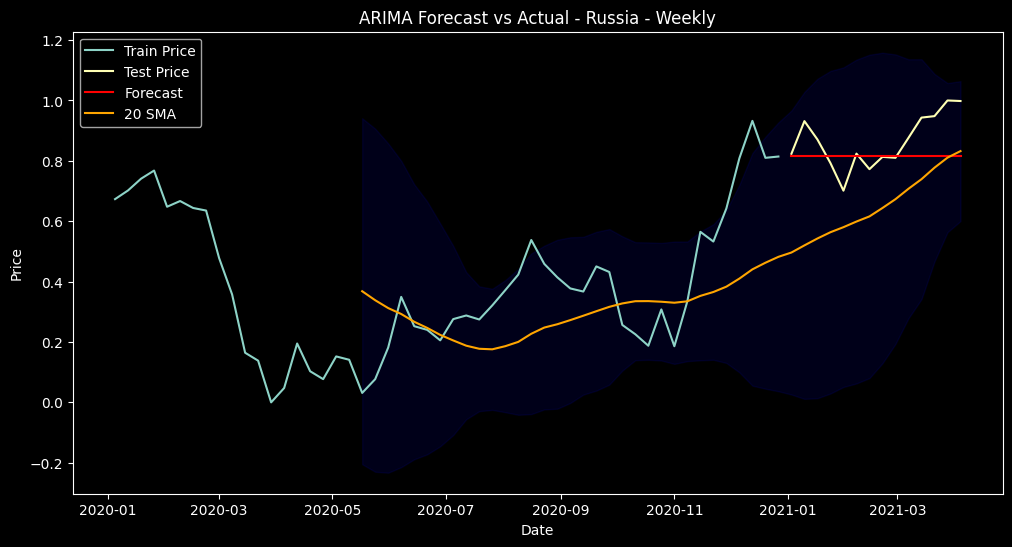

RMSE: 0.0980502255770294
MAPE: 8.360122497751922%


(0.0980502255770294, 0.08360122497751922)

In [79]:
arima(russiaw, "Russia - Weekly")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.961, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=246.918, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=246.907, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.050, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=248.698, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.288 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -120.481
Date:                Wed, 26 Jun 2024   AIC                            244.961
Time:                        09:50:52   BIC                            247.893
Sample:                    05-17-2020   HQIC                           245.933
                    

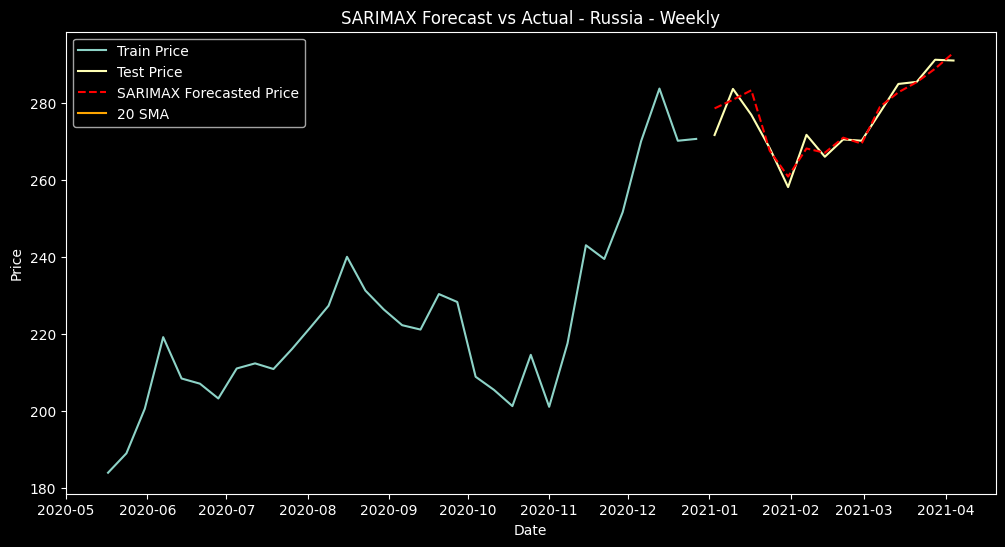

RMSE: 3.111519272025079
MAPE: 0.8667641629087323%


In [80]:
sarimax_forecast(russiaw, "Russia - Weekly")

09:50:54 - cmdstanpy - INFO - Chain [1] start processing
09:50:54 - cmdstanpy - INFO - Chain [1] done processing


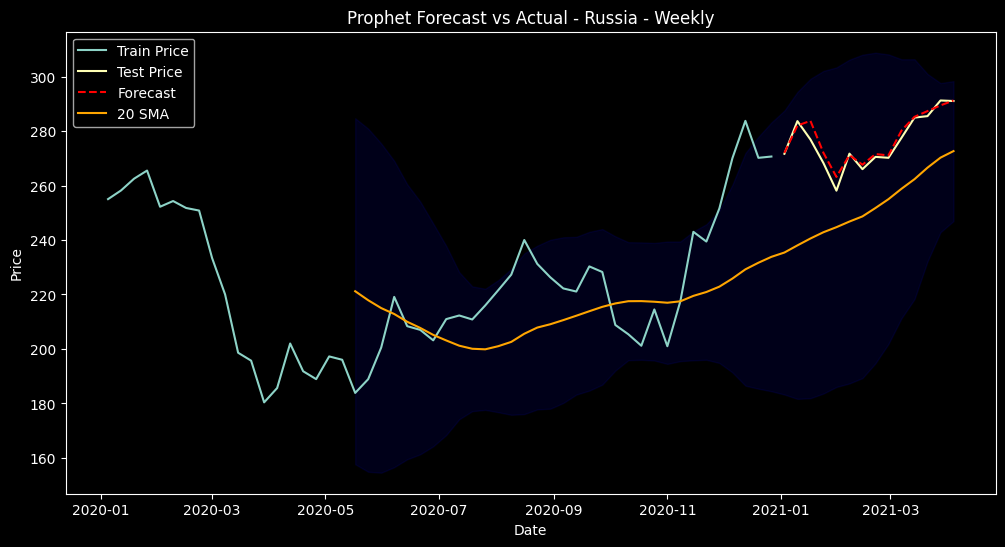

RMSE: 2.7728852124076813
MAPE: 0.7445787083605893%


In [81]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
prophet_forecast(russiaw, "Russia - Weekly")

In [82]:
# Monthly data
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
print(russiam.head())

        Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0 2020-01-31  252.20  255.99   270.8   251.4      747.14   -0.0080  2020   
1 2020-02-29  233.36   251.8  259.77   231.0      919.84   -0.0754  2020   
2 2020-03-31  187.21  238.93   241.0  172.15     3001.72   -0.1884  2020   
3 2020-04-30  197.25   183.2  205.44   182.0     1768.20    0.0566  2020   
4 2020-05-31  200.50  195.68   205.0  183.33     1359.04    0.0192  2020   

   Month  
0      1  
1      2  
2      3  
3      4  
4      5  


In [83]:
#plot_stock_data(russiam, "Russia - Monthly")
candlestick_volume(russiam, "Russia - Monthly")

In [84]:
# Split the data
train_russiam = russiam[russiam['Year'] == 2020]
test_russiam = russiam[russiam['Year'] == 2021]

ADF Statistic: -0.12004692243057899
p-value: 0.9474048119507879
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10.259, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7.304, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8.399, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8.834, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6.714, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8.387, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8.105, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6.160, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8.092, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.668 seconds
    

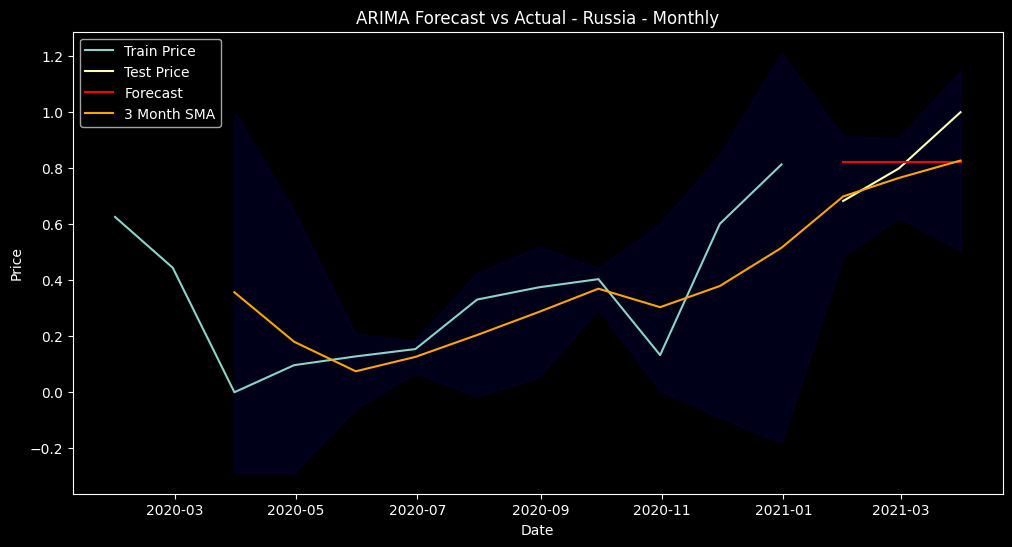

RMSE: 0.13108897664551264
MAPE: 13.637825669925629%


In [85]:
arima_monthly(russiam, "Russia - Monthly")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.163, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.640, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=113.298, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=165.947, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=115.016, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.501 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -53.649
Date:                Wed, 26 Jun 2024   AIC                            113

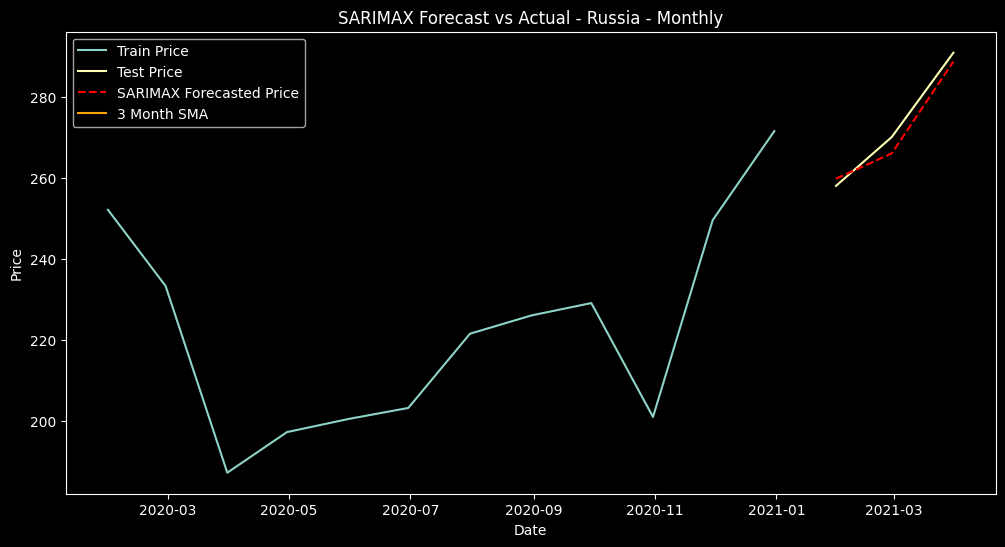

RMSE: 2.8406057166654204
MAPE: 0.9774017007729943%


In [86]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
sarimax_forecast_monthly(russiam, "Russia - Monthly")

09:50:57 - cmdstanpy - INFO - Chain [1] start processing
09:51:04 - cmdstanpy - INFO - Chain [1] done processing


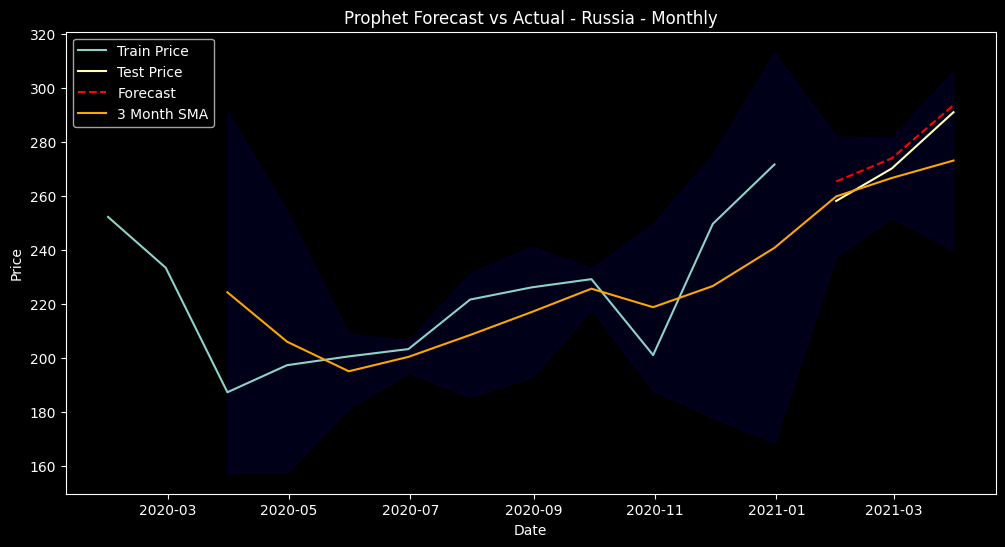

RMSE: 4.941983127908301
MAPE: 1.6981650137467257%


In [87]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
prophet_forecast_monthly(russiam, "Russia - Monthly")

##### Recommendation System

##### Even though the ARIMA model had the lowest RMSE and MAPE values, we can see from the chart that the forecasted price is a flat line. The SARIMAX model had the lowest RMSE and MAPE values for the daily and weekly charts for the majority of markets with linear regression and Prophet closely behind. We will use the SARIMAX model for recommendation. For all of our monthly charts, we used a 3-month moving average and the forecasted price never touched the Bollinger Bands on any of our models, therefore we will not try to recommend any buying or selling for that timeframe.

##### We can see that the forecasts are within the Bollinger Bands. In order to determine if we should buy or hold, we will use the first standard deviation Bollinger Bands. If the forecasted price touches the lower band we should buy and exit the position when the price goes back up to the SMA, otherwise we should hold.

##### We start with an account balance of $10,000 for each market. We will keep track of the number of trades taken, the average hold time, average return and cumulative account balance.

Running SARIMAX for russia...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1499.638, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1501.228, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1501.180, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1497.685, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1502.372, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.531 seconds


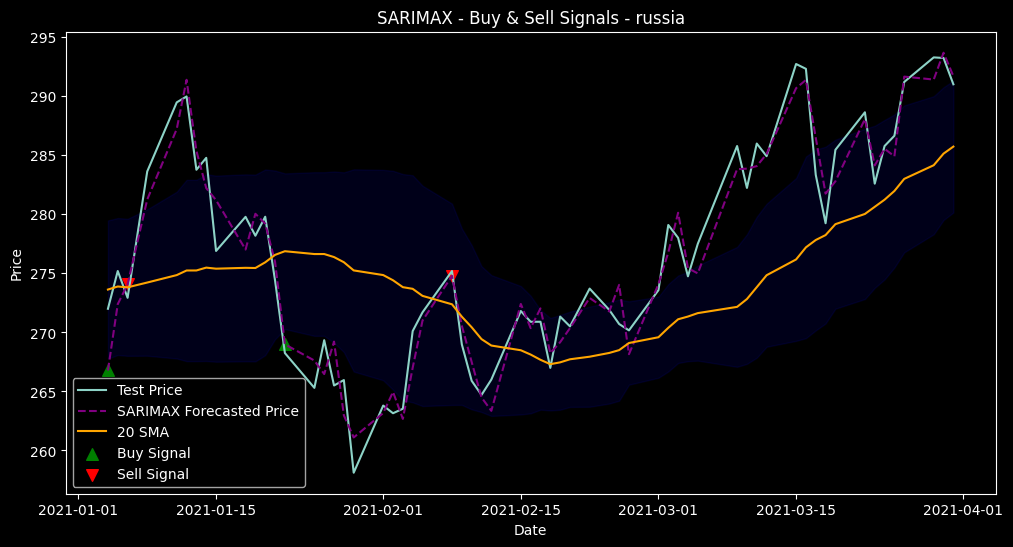

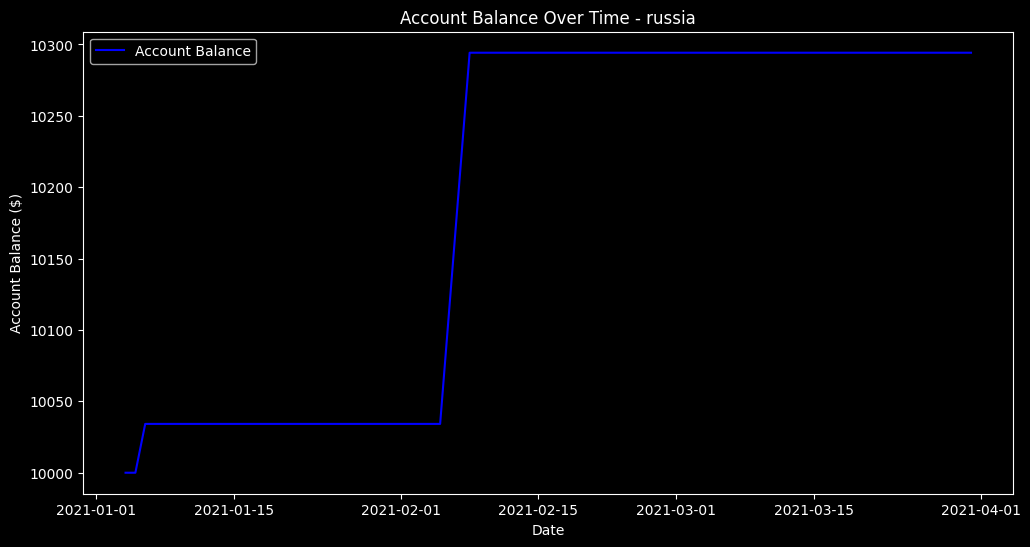

Number of trades: 2
Average hold time: 9.50 days
Average return per trade: 1.47%
Final account balance: $10294.16
Running SARIMAX for turkey...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=259.173, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=254.949, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=256.283, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=256.238, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252.963, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=257.994, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.553 seconds


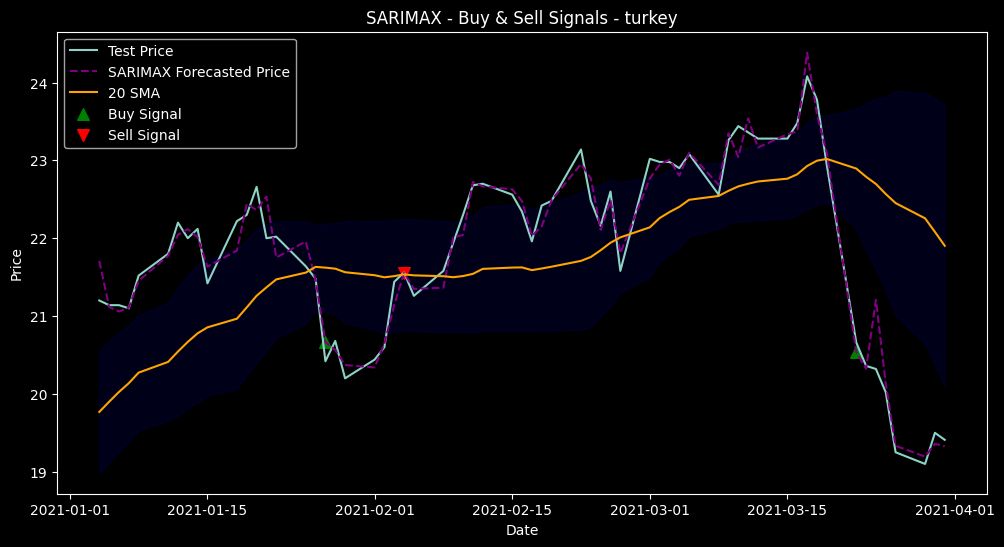

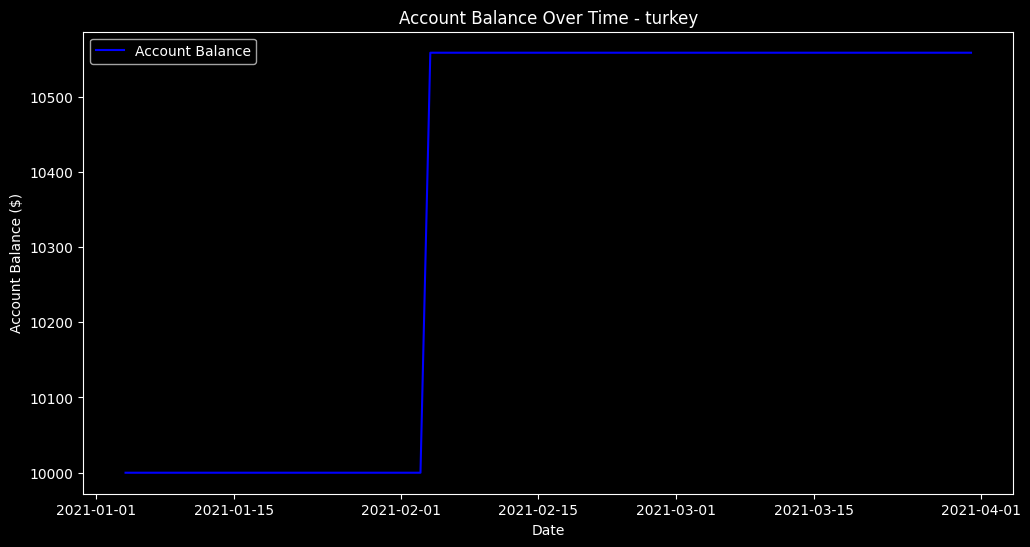

Number of trades: 1
Average hold time: 8.00 days
Average return per trade: 5.58%
Final account balance: $10558.28
Running SARIMAX for egypt...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-467.609, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-460.434, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-473.345, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-472.224, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-461.963, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-471.346, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-471.346, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-469.353, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-474.986, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-472.988, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-472.987, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-473.835, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0

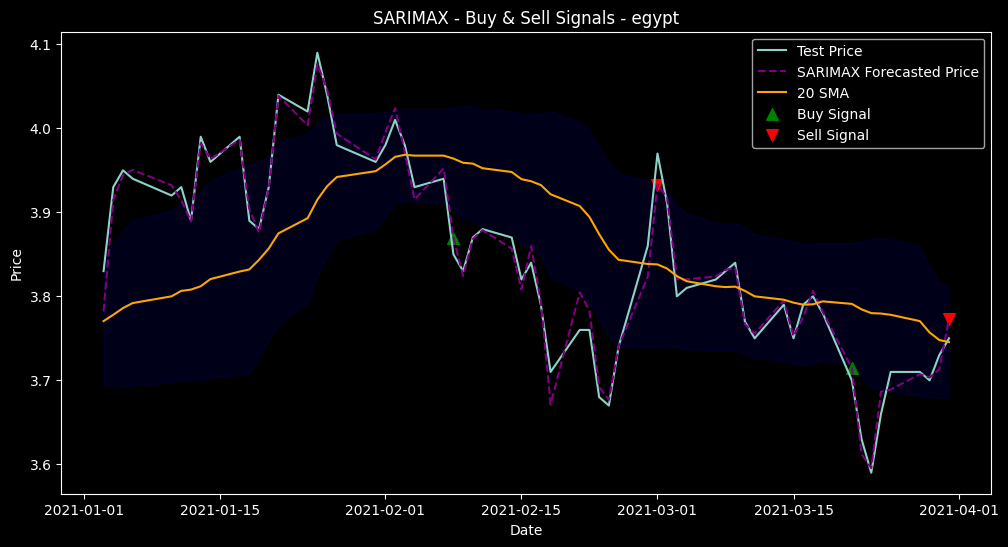

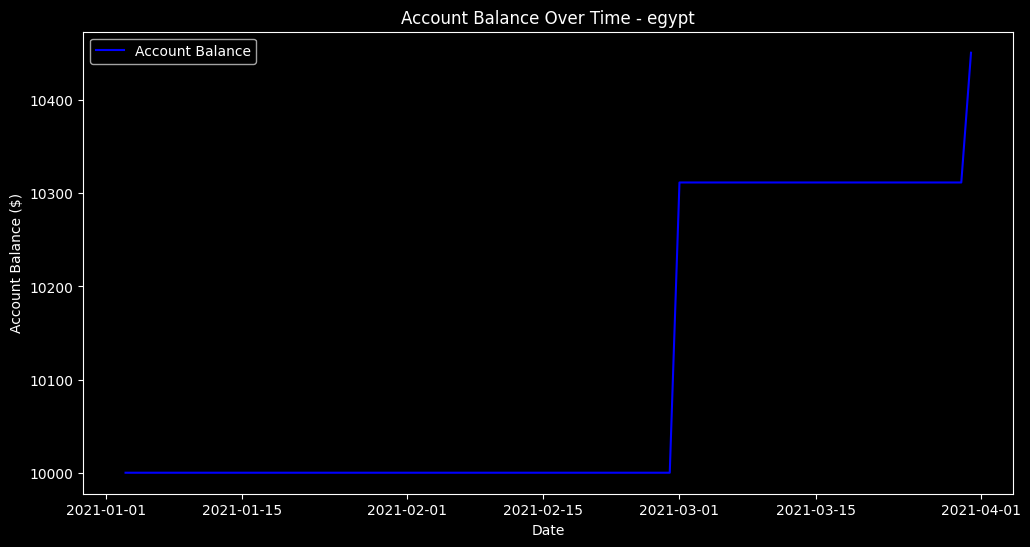

Number of trades: 2
Average hold time: 15.50 days
Average return per trade: 2.23%
Final account balance: $10451.04
Running SARIMAX for brazil...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=265.497, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1023.381, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=272.351, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=755.560, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1943.520, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=268.521, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=274.402, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=263.052, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=267.459, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=261.718, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=263.998, Time=0.30 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=262.996, Time=0.43 sec
 ARIMA(4,0,3)(0,0,0)[0] interc

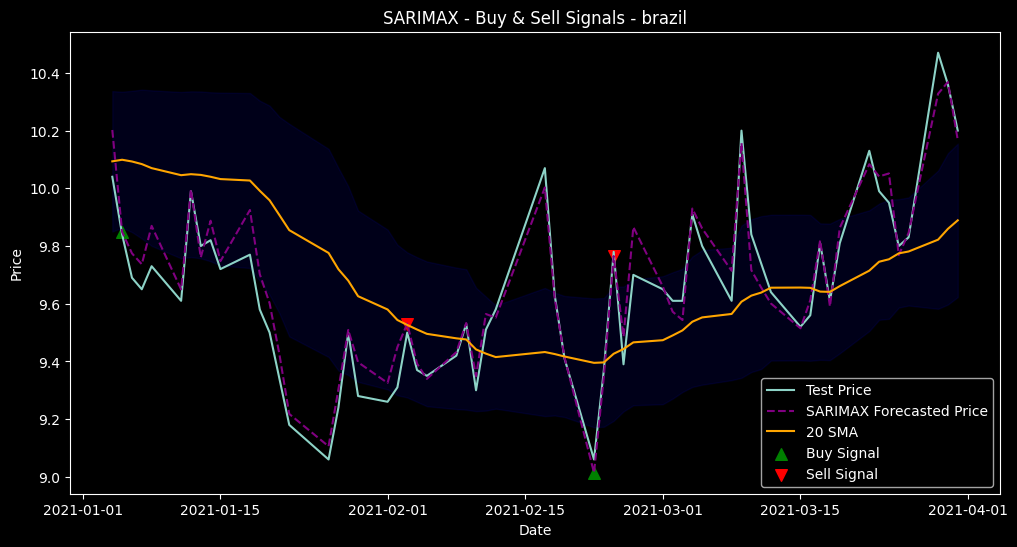

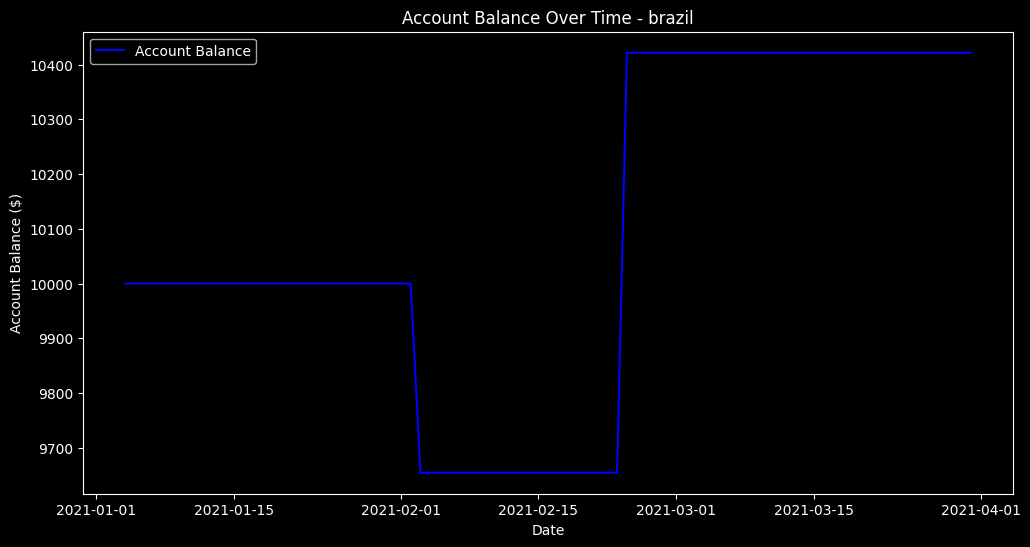

Number of trades: 2
Average hold time: 15.50 days
Average return per trade: 2.25%
Final account balance: $10421.71
Running SARIMAX for argentina...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1030.896, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1031.735, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1031.803, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1029.693, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1032.387, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.502 seconds


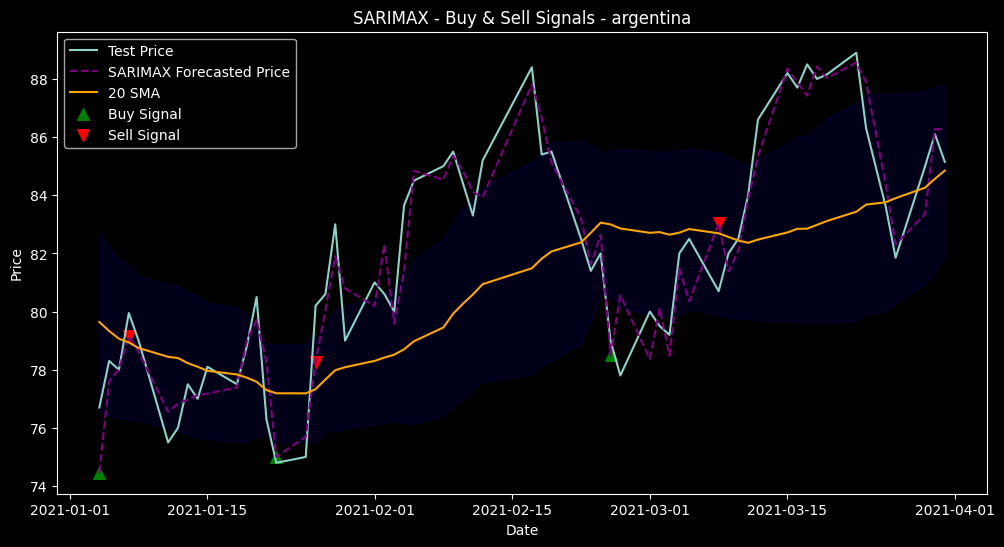

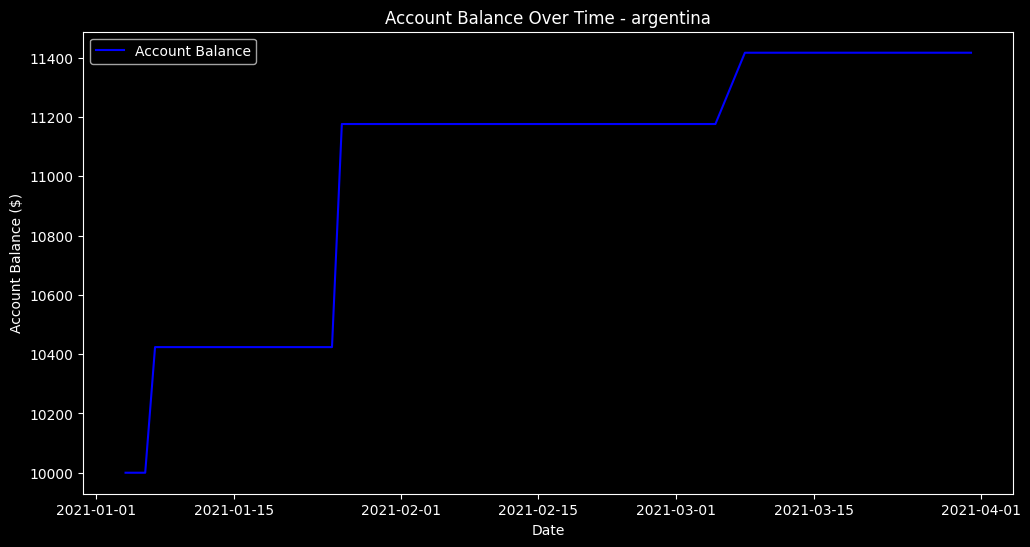

Number of trades: 3
Average hold time: 6.00 days
Average return per trade: 4.54%
Final account balance: $11416.75
Running SARIMAX for colombia...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3267.144, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3192.285, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3124.092, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3125.324, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3125.454, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3126.455, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.549 seconds


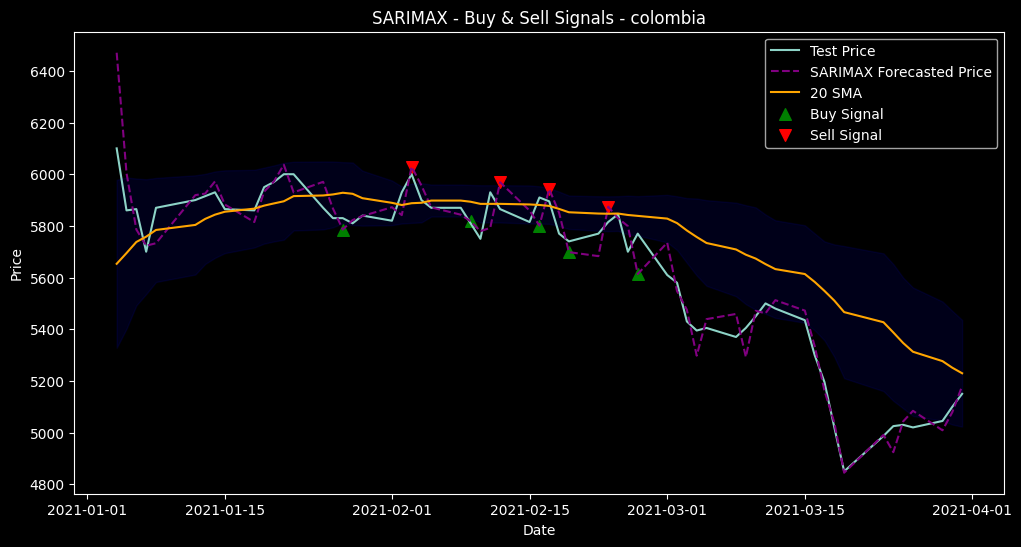

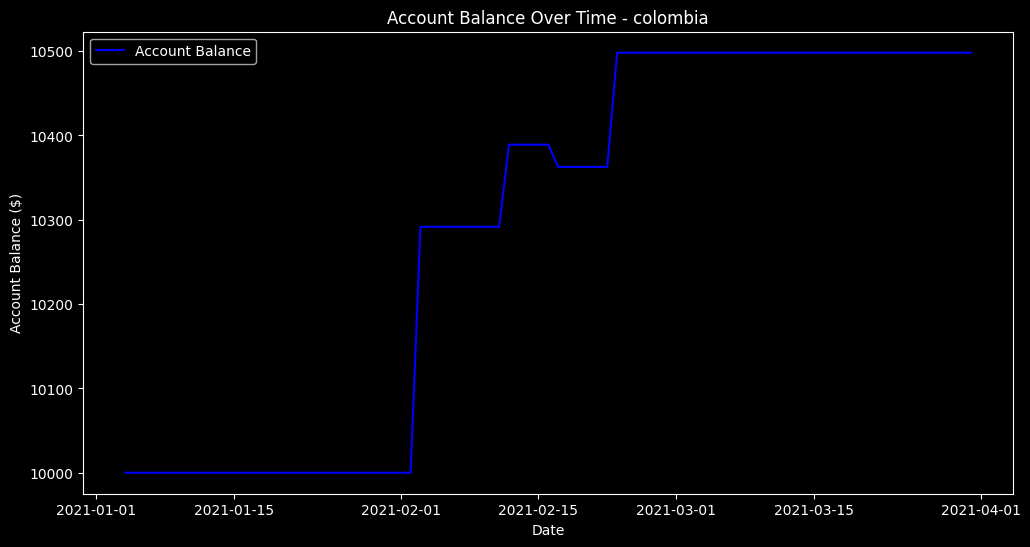

Number of trades: 4
Average hold time: 3.75 days
Average return per trade: 1.23%
Final account balance: $10498.05
Running SARIMAX for safrica...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3973.469, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3975.306, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3975.309, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3971.787, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3977.309, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.495 seconds


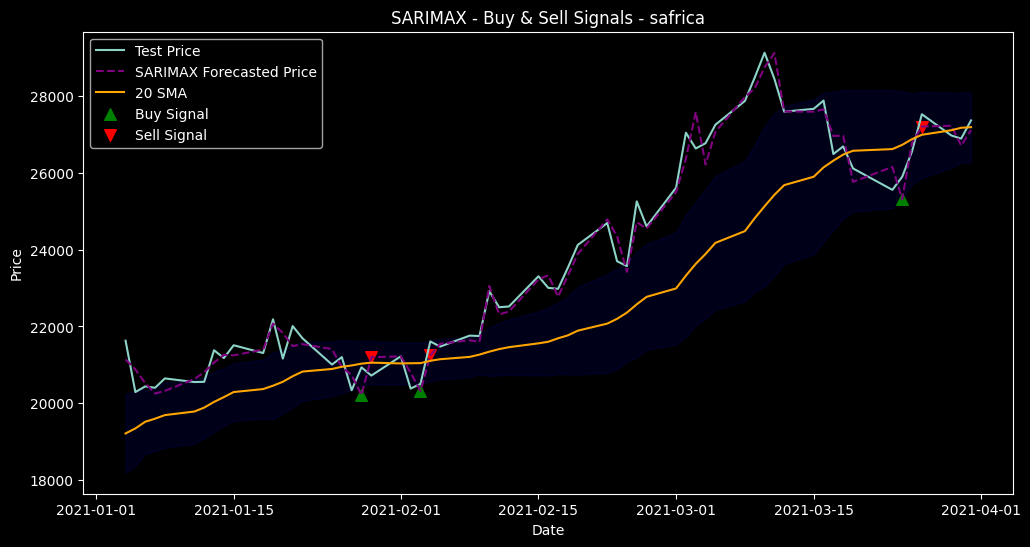

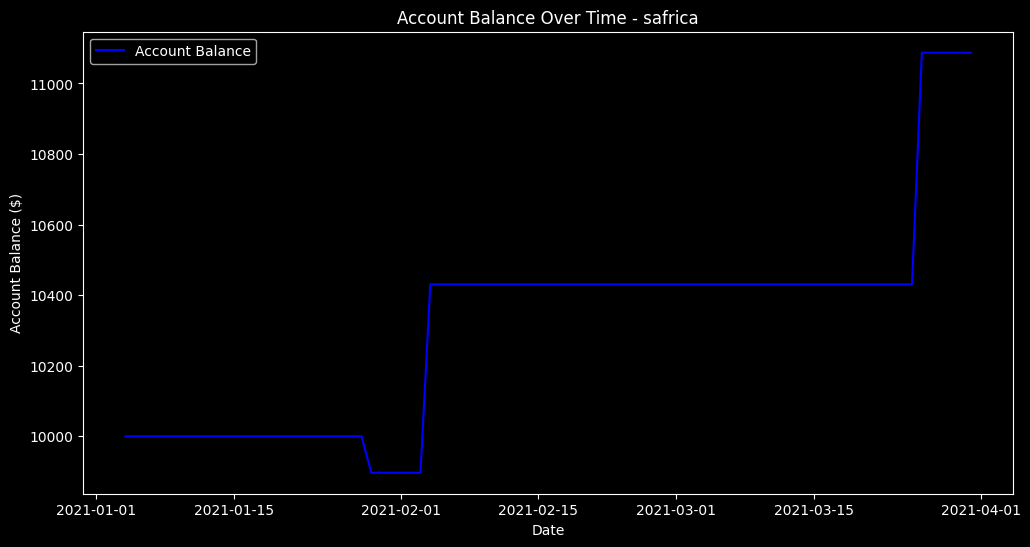

Number of trades: 3
Average hold time: 1.33 days
Average return per trade: 3.55%
Final account balance: $11087.09
Running SARIMAX for skorea...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3377.565, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3376.061, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3377.390, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3377.482, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3374.480, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3378.730, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.414 seconds


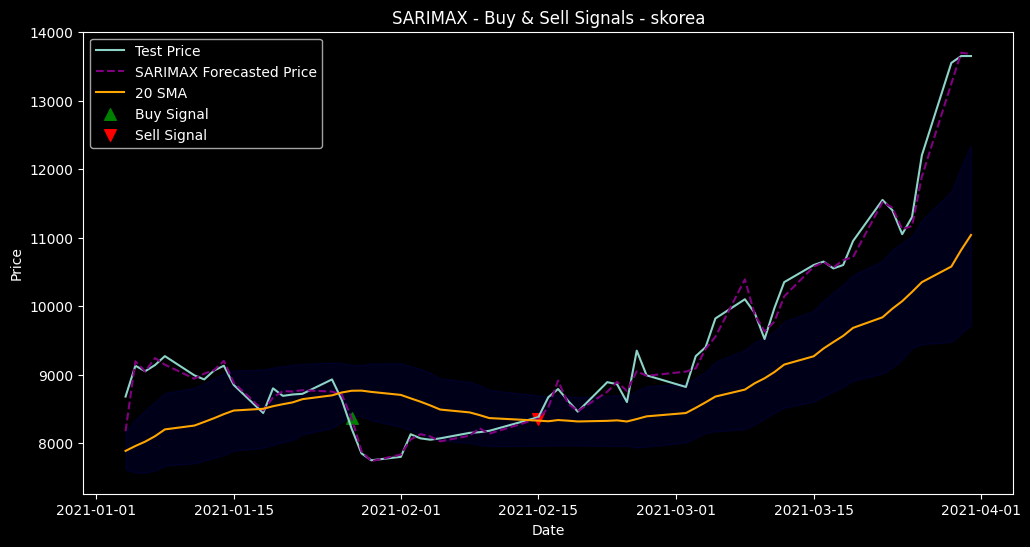

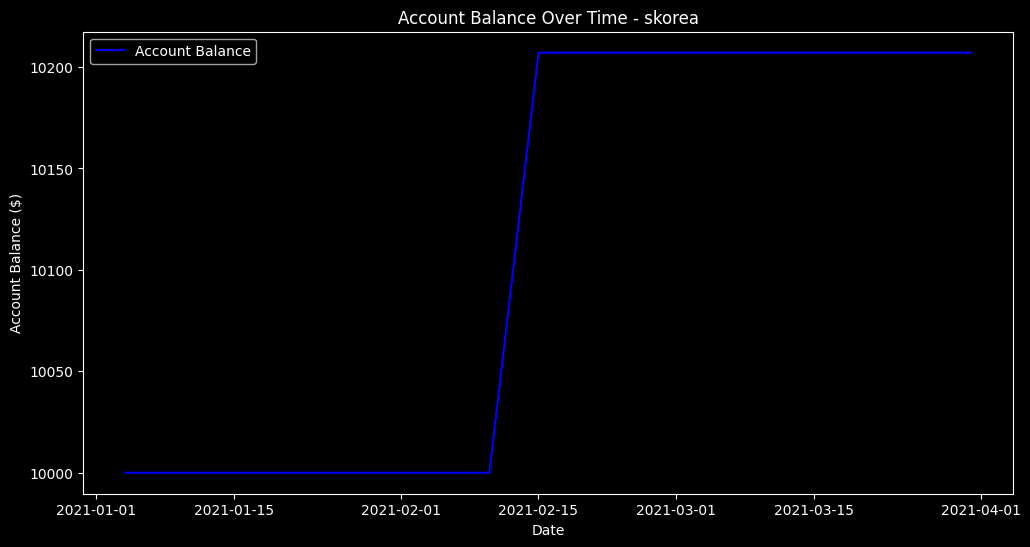

Number of trades: 1
Average hold time: 19.00 days
Average return per trade: 2.07%
Final account balance: $10207.06


In [88]:
markets = {
    'russia': "Russia",
    'turkey': "Turkey",
    'egypt': "Egypt",
    'brazil': "Brazil",
    'argentina': "Argentina",
    'colombia': "Colombia",
    'safrica': "South Africa",
    'skorea': "South Korea"
}

russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)

market_dataframes = {
    'russia': russia,
    'turkey': turkey,
    'egypt': egypt,
    'brazil': brazil,
    'argentina': argentina,
    'colombia': colombia,
    'safrica': safrica,
    'skorea': skorea
}

for market in market_dataframes:
    market_dataframes[market] = preprocess_dataframe(market_dataframes[market])

# Store results in a dictionary
results = {}

for market, df in market_dataframes.items():
    print(f"Running SARIMAX for {market}...")
    test_df, num_trades, final_capital, total_profit = sarimax_recommend(df, market)
    results[market] = {
        'num_trades': num_trades,
        'final_capital': final_capital,
        'total_profit': total_profit
    }

In [89]:
# Initial capital for each market
initial_capital = 10000

# Calculate total capital deployed
total_capital_deployed = initial_capital * len(results)

# Calculate total profit earned
total_profit_earned = sum(result['total_profit'] for result in results.values())

# Calculate annualized rate of return (for the 3 months)
# Assuming the 3-month period is one quarter of a year
total_final_capital = sum(result['final_capital'] for result in results.values())
annualized_rate_of_return = ((total_final_capital / total_capital_deployed) ** 4) - 1

print(f"Total capital deployed: ${total_capital_deployed:.2f}")
print(f"Total profit earned: ${total_profit_earned:.2f}")
print(f"Annualized rate of return: {annualized_rate_of_return:.2%}")


Total capital deployed: $80000.00
Total profit earned: $4934.14
Annualized rate of return: 27.05%


##### Overall, using the SARIMAX model on a daily timefrime generated positive returns (although small) for all the markets. We only had one loss in Brazil. We recommended Buy, Hold and Sell decisions while maximizing capital returns and minimizing losses and hold perdiods.


##### The total profit earned over the 3 month period from January 1, 2021 to March 31, 2021 was $4934.14 for a total capital of $80,000 which leads to an annualized rate of return of 27.05%.

##### Not a lot of signals were generated from just using the Bollinger Bands and SMA. In order to create more buy and sell signals, maximize capital returns and minimize losses, we can add more conditions to the recommendation system such as the Relative Strenght Index (RSI), a momentum oscillator that measures the speed and change of price movements. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. We could also make trading decisions based on volume, since volume can indiate market strength.